In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')
np.seterr('ignore')
pd.set_option("display.max_columns", 100)

print("ok")

ok


In [3]:
cols = ['user_id', 'item_id', 'rating', 'timestamp']

# sep='\t'はタブ区切り
# header=Noneはヘッダ行がないことを示す
# names=colsは列名を指定する
# engine='python'はエンジンをPythonに指定する
df_data = pd.read_csv('u.data', sep='\t', header=None, names=cols, engine='python')

df_data.head(10)

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
5      298      474       4  884182806
6      115      265       2  881171488
7      253      465       5  891628467
8      305      451       3  886324817
9        6       86       3  883603013

In [4]:
# SVD, NMF, MFで用いる'user_item_matrix'行列の作成する

# user_id × item_id の行列（値は rating、未評価はNaN）
user_item_matrix = df_data.pivot_table(index="user_id", columns="item_id", values="rating")

# 結果確認
print(user_item_matrix.shape)  # → (943, 1682)
user_item_matrix.head()


(943, 1682)


item_id  1     2     3     4     5     6     7     8     9     10    11    \
user_id                                                                     
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0   2.0   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.0   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

item_id  12    13    14    15    16    17    18    19    20    21    22    \
user_id                                                                     
1         5.0   5.0   5.0   5.0   5.0   3.0   4.0   5.0   4.0   1.0   4.0   
2         NaN   4.0   4.0   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN   3.0   NaN   

item_id  23    24    25    26    27    28    29    30    31    32    33    \
user_id                                                                     
1         4.0   3.0   4.0   3.0   2.0   4.0   1.0   3.0   3.0   5.0   4.0   
2         NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   4.0   3.0   NaN   NaN   NaN   4.0   NaN   NaN   NaN   NaN   

item_id  34    35    36    37    38    39    40    41    42    43    44    \
user_id                                                                     
1         2.0   1.0   2.0   2.0   3.0   4.0   3.0   2.0   5.0   4.0   5.0   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   NaN   4.0   NaN   5.0   NaN   NaN   

item_id  45    46    47    48    49    50    ...  1633  1634  1635  1636  \
user_id                                      ...                           
1         5.0   4.0   4.0   5.0   3.0   5.0  ...   NaN   NaN   NaN   NaN   
2         NaN   NaN   NaN   NaN   NaN   5.0  ...   NaN   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   5.0  ...   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   4.0  ...   NaN   NaN   NaN   NaN   

item_id  1637  1638  1639  1640  1641  1642  1643  1644  1645  1646  1647  \
user_id                                                                     
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

item_id  1648  1649  1650  1651  1652  1653  1654  1655  1656  1657  1658  \
user_id                                                                     
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

item_id  1659  1660  1661  1662  1663  1664  1665  1666  1667  1668  1669  \
user_id                                                                     
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [5]:
# MFの実行

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

# ① MovieLensの評価データを用意（df_data に user_id, item_id, rating がある前提）
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_data[["user_id", "item_id", "rating"]], reader)

# ② 学習・テストに分割
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# ③ MF（SVD）モデルで学習
model = SVD(n_factors=20, random_state=42)
model.fit(trainset)

# ④ テストセットで精度を確認
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))


RMSE: 0.9350
RMSE: 0.9349581398847258


In [6]:
import pandas as pd
import numpy as np

# ① ユニークな user_id と item_id を取得
user_ids = sorted(df_data["user_id"].unique())
item_ids = sorted(df_data["item_id"].unique())

# ② 空の DataFrame を作成（行：ユーザー、列：映画）
mf_matrix = pd.DataFrame(index=user_ids, columns=item_ids)

# ③ 各ユーザー×アイテムの予測スコアをSVDで埋める
for user in user_ids:
    for item in item_ids:
        pred = model.predict(user, item).est
        mf_matrix.at[user, item] = round(pred, 3)

# ④ データ型を float に変換
mf_matrix = mf_matrix.astype(float)

# ⑤ 確認（行数・列数）
print("行列サイズ:", mf_matrix.shape)
mf_matrix

行列サイズ: (943, 1682)


1      2      3      4      5      6      7      8      9      10    \
1    4.085  3.251  3.046  3.740  3.261  3.696  4.280  3.901  4.086  3.953   
2    3.842  3.157  3.156  3.768  3.409  3.513  3.957  4.080  3.799  3.925   
3    3.285  2.654  2.600  2.977  2.751  3.098  2.939  3.417  3.323  3.368   
4    4.528  3.996  3.807  4.318  4.025  4.366  4.521  4.808  4.583  4.622   
5    3.475  3.094  2.811  3.181  2.892  3.138  3.597  3.484  3.323  3.592   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
939  4.864  4.374  4.163  4.407  4.307  4.549  4.831  4.804  4.532  4.809   
940  3.489  2.899  2.798  3.084  3.013  3.447  3.343  3.537  3.610  3.584   
941  4.155  3.436  3.442  3.704  3.499  3.810  4.046  4.167  4.319  4.231   
942  4.330  3.664  3.497  4.021  3.678  4.092  4.152  4.588  4.251  4.414   
943  3.895  3.368  3.235  3.599  3.342  3.713  3.914  3.950  4.188  3.993   

      11     12     13     14     15     16     17     18     19     20    \
1    3.564  4.644  3.725  4.079  3.485  3.628  3.272  3.563  4.142  3.657   
2    3.955  4.476  3.661  4.065  3.741  3.334  3.310  3.494  4.089  3.322   
3    3.462  3.897  2.952  3.407  3.207  2.717  2.680  2.723  3.476  2.739   
4    4.611  5.000  4.123  4.638  4.490  4.108  4.068  4.062  4.732  4.044   
5    3.431  4.048  2.815  3.273  3.211  2.937  2.861  2.960  3.371  2.836   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
939  4.810  5.000  4.304  4.608  4.623  4.317  4.138  4.305  4.860  4.295   
940  3.504  3.922  3.123  3.397  3.492  3.116  3.039  2.930  3.659  3.054   
941  4.013  4.543  3.708  4.052  4.013  3.597  3.593  3.578  4.134  3.512   
942  4.158  4.824  3.784  4.533  4.328  3.759  3.885  3.792  4.457  3.848   
943  3.946  4.458  3.371  4.063  3.793  3.519  3.396  3.387  4.022  3.434   

      21     22     23     24     25     26     27     28     29     30    \
1    2.563  4.268  4.150  3.525  3.276  3.427  3.195  4.090  2.573  3.626   
2    2.906  4.264  4.290  3.604  3.647  3.628  3.215  4.135  2.722  3.908   
3    2.292  3.616  3.605  2.840  2.951  3.059  2.713  3.477  2.071  3.434   
4    3.583  4.872  4.826  4.229  4.124  4.294  3.962  4.631  3.573  4.749   
5    2.607  3.842  3.575  3.054  2.920  2.998  2.851  3.525  2.679  3.524   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
939  3.969  5.000  5.000  4.341  4.393  4.510  4.286  5.000  3.845  4.830   
940  2.792  3.987  3.723  3.007  3.385  3.187  3.002  3.616  2.498  3.799   
941  3.186  4.382  4.193  3.713  3.774  3.726  3.539  4.181  3.010  4.141   
942  3.240  4.725  4.534  3.841  3.930  3.925  3.593  4.348  3.128  4.389   
943  2.867  4.220  3.953  3.410  3.355  3.491  3.378  3.925  2.857  3.953   

      31     32     33     34     35     36     37     38     39     40    \
1    3.676  3.842  3.417  3.200  2.720  2.508  2.842  3.052  3.403  3.086   
2    3.810  3.811  3.451  3.376  2.826  2.636  3.040  3.181  3.405  3.245   
3    3.303  3.321  3.088  2.825  2.347  1.922  2.549  2.422  2.842  2.478   
4    4.431  4.680  4.234  4.056  3.634  3.275  3.848  3.758  4.034  3.802   
5    3.086  3.358  2.935  2.704  2.395  2.139  2.507  2.803  2.884  2.614   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
939  4.696  4.776  4.406  4.230  3.770  3.502  3.951  4.131  4.338  4.005   
940  3.432  3.634  3.184  3.108  2.624  2.242  2.872  2.652  3.025  2.783   
941  3.888  4.067  3.815  3.411  3.079  2.817  3.176  3.195  3.561  3.390   
942  4.038  4.438  3.971  3.798  3.346  3.031  3.505  3.363  3.583  3.571   
943  3.664  3.990  3.648  3.252  2.953  2.513  3.127  3.047  3.327  3.049   

      41     42     43     44     45     46     47     48     49     50    \
1    3.190  3.766  2.975  3.718  4.175  3.611  3.538  4.286  3.282  4.613   
2    3.109  3.793  2.934  3.545  4.224  3.653  3.603  4.199  3.383  4.719   
3    2.637  3.414  2.471  2.939  3.479  3.138  3.174  3.523  2.850  3.926  

# UMAP(2次元) and k-means(k=3)

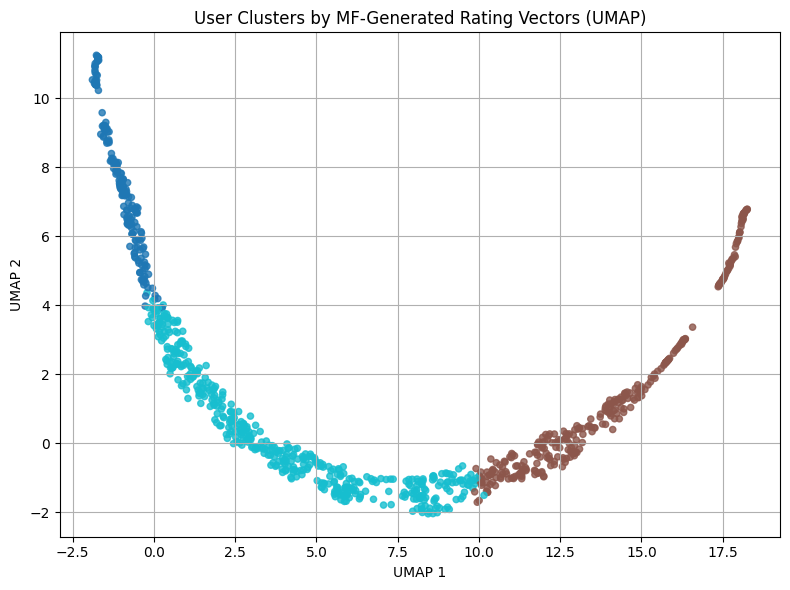

In [7]:
import umap
from sklearn.cluster import KMeans

# ユーザー行列（user × item）のまま使う
# (1回目と2回目でUMAPの結果がことなったの原因は，mf_matrixにcluster番号を入れたため)
mf_matrix_umap = mf_matrix.copy()
X = mf_matrix.values

# 次元圧縮（UMAP, 次元数は2）
umap_embedding = umap.UMAP(n_components=2, random_state=42).fit_transform(X)

# クラスタリング（任意：3クラスタ）
umap_labels = KMeans(n_clusters=3, random_state=42 , n_init=150).fit_predict(X)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=umap_labels, cmap='tab10', s=20, alpha=0.8)
plt.title("User Clusters by MF-Generated Rating Vectors (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

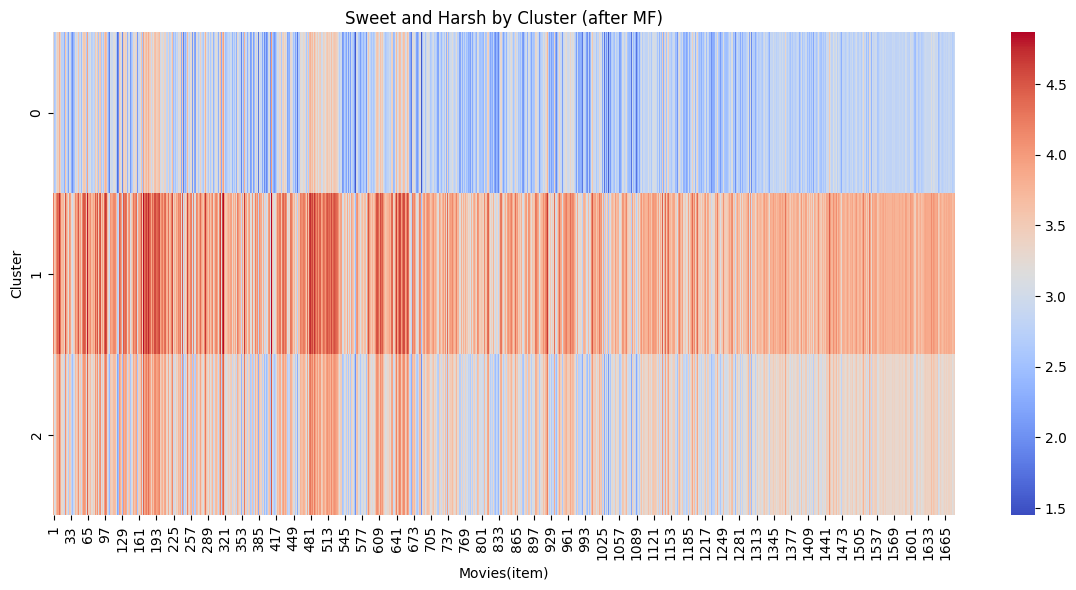

In [8]:
# クラスタ列を追加（再度）
# ここでのlabelsは'UMAP'で次元削減をしてk-meansを行った時に作成したlabel
mf_matrix_umap['cluster_umap'] = umap_labels

# clusterごとのジャンル評価傾向の平均を集計
cluster_profile_umap = mf_matrix_umap.groupby('cluster_umap').mean()

# 可視化
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile_umap, fmt=".2f", cmap="coolwarm")
plt.title("Sweet and Harsh by Cluster (after MF)")
plt.xlabel("Movies(item)")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

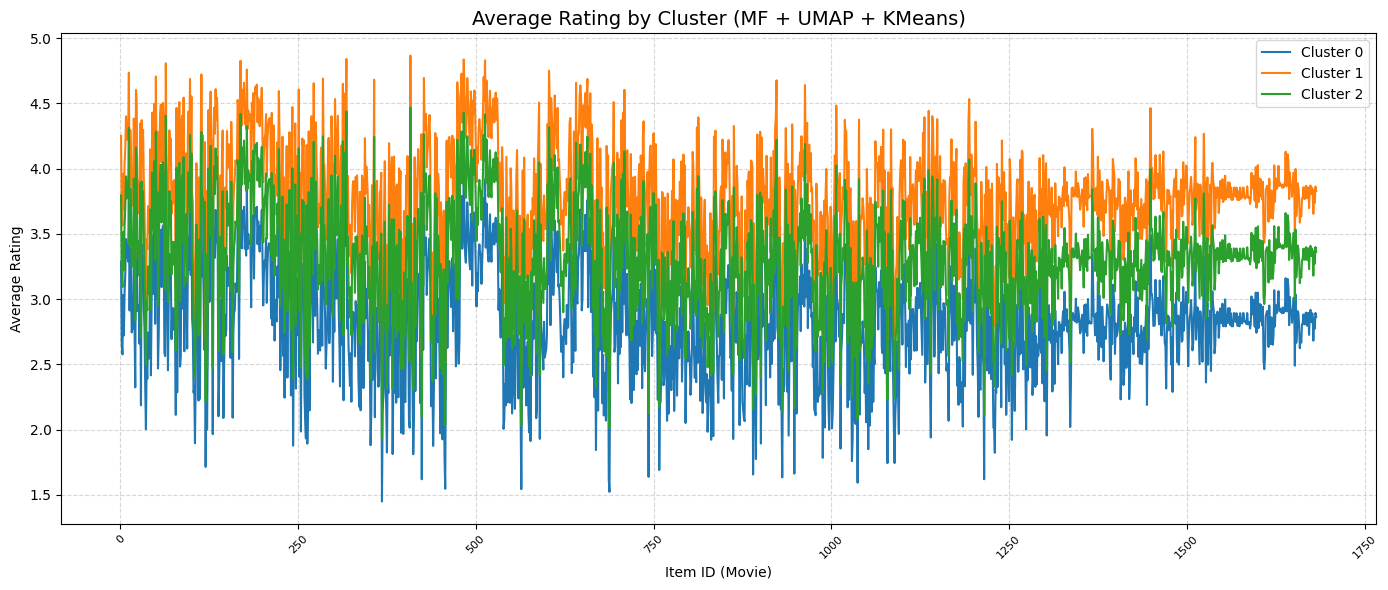

In [9]:
# 集約統計量だと分かりにくいから，折れ線グラフで可視化する

import matplotlib.pyplot as plt

# 折れ線グラフでクラスタごとの傾向を比較
plt.figure(figsize=(14, 6))

for cluster_id in cluster_profile_umap.index:
    plt.plot(
        cluster_profile_umap.columns,  # 横軸 = ジャンル（アイテムID）
        cluster_profile_umap.loc[cluster_id],  # 縦軸 = 各ジャンルの平均rating
        label=f"Cluster {cluster_id}"
    )

plt.title("Average Rating by Cluster (MF + UMAP + KMeans)", fontsize=14)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
mf_matrix_umap.head()

1      2      3      4      5      6      7      8      9     10  \
1  4.085  3.251  3.046  3.740  3.261  3.696  4.280  3.901  4.086  3.953   
2  3.842  3.157  3.156  3.768  3.409  3.513  3.957  4.080  3.799  3.925   
3  3.285  2.654  2.600  2.977  2.751  3.098  2.939  3.417  3.323  3.368   
4  4.528  3.996  3.807  4.318  4.025  4.366  4.521  4.808  4.583  4.622   
5  3.475  3.094  2.811  3.181  2.892  3.138  3.597  3.484  3.323  3.592   

      11     12     13     14     15     16     17     18     19     20  \
1  3.564  4.644  3.725  4.079  3.485  3.628  3.272  3.563  4.142  3.657   
2  3.955  4.476  3.661  4.065  3.741  3.334  3.310  3.494  4.089  3.322   
3  3.462  3.897  2.952  3.407  3.207  2.717  2.680  2.723  3.476  2.739   
4  4.611  5.000  4.123  4.638  4.490  4.108  4.068  4.062  4.732  4.044   
5  3.431  4.048  2.815  3.273  3.211  2.937  2.861  2.960  3.371  2.836   

      21     22     23     24     25     26     27     28     29     30  \
1  2.563  4.268  4.150  3.525  3.276  3.427  3.195  4.090  2.573  3.626   
2  2.906  4.264  4.290  3.604  3.647  3.628  3.215  4.135  2.722  3.908   
3  2.292  3.616  3.605  2.840  2.951  3.059  2.713  3.477  2.071  3.434   
4  3.583  4.872  4.826  4.229  4.124  4.294  3.962  4.631  3.573  4.749   
5  2.607  3.842  3.575  3.054  2.920  2.998  2.851  3.525  2.679  3.524   

      31     32     33     34     35     36     37     38     39     40  \
1  3.676  3.842  3.417  3.200  2.720  2.508  2.842  3.052  3.403  3.086   
2  3.810  3.811  3.451  3.376  2.826  2.636  3.040  3.181  3.405  3.245   
3  3.303  3.321  3.088  2.825  2.347  1.922  2.549  2.422  2.842  2.478   
4  4.431  4.680  4.234  4.056  3.634  3.275  3.848  3.758  4.034  3.802   
5  3.086  3.358  2.935  2.704  2.395  2.139  2.507  2.803  2.884  2.614   

      41     42     43     44     45     46     47     48     49     50  ...  \
1  3.190  3.766  2.975  3.718  4.175  3.611  3.538  4.286  3.282  4.613  ...   
2  3.109  3.793  2.934  3.545  4.224  3.653  3.603  4.199  3.383  4.719  ...   
3  2.637  3.414  2.471  2.939  3.479  3.138  3.174  3.523  2.850  3.926  ...   
4  3.940  4.613  3.726  4.233  4.769  4.439  4.299  4.809  4.132  5.000  ...   
5  2.859  3.368  2.597  2.839  3.439  3.298  3.158  3.806  2.825  3.841  ...   

    1634   1635   1636   1637   1638   1639   1640   1641   1642   1643  \
1  3.444  3.705  3.444  3.452  3.414  3.624  3.477  3.585  3.695  3.571   
2  3.503  3.553  3.503  3.487  3.444  3.736  3.520  3.501  3.787  3.737   
3  2.933  2.914  2.933  2.914  2.995  3.226  2.984  2.967  3.224  3.098   
4  4.201  4.221  4.201  4.255  4.192  4.432  4.196  4.240  4.479  4.364   
5  2.988  2.769  2.988  3.004  2.933  3.226  2.878  3.042  3.121  3.338   

    1644   1645   1646   1647   1648   1649   1650   1651   1652   1653  \
1  3.314  3.514  3.592  3.455  3.270  3.471  3.699  3.585  3.005  3.536   
2  3.437  3.639  3.472  3.514  3.377  3.456  3.721  3.748  2.971  3.699   
3  2.866  3.096  2.901  3.014  2.938  2.935  3.080  3.001  2.437  3.001   
4  4.102  4.327  4.201  4.205  4.174  4.192  4.324  4.239  3.792  4.325   
5  2.979  2.986  2.957  2.928  2.743  2.921  3.087  3.161  2.868  3.197   

    1654   1655   1656   1657   1658   1659   1660   1661   1662   1663  \
1  3.199  3.304  3.312  3.584  3.152  3.137  3.354  3.401  3.347  3.182   
2  3.337  3.397  3.421  3.460  3.325  3.329  3.299  3.270  3.423  3.383   
3  2.700  2.722  2.967  2.846  2.775  2.740  2.861  2.657  2.814  2.870   
4  3.928  4.038  4.236  4.247  4.065  3.900  4.069  4.017  4.119  4.111   
5  2.825  2.867  3.080  3.140  2.768  2.737  2.846  2.728  2.751  2.868   

    1664   1665   1666   1667   1668   1669   1670   1671   1672   1673  \
1  3.328  3.481  3.374  3.409  3.551  3.270  3.444  3.444  3.352  3.444   
2  3.568  3.401  3.583  3.436  3.470  3.425  3.503  3.503  3.331  3.503   
3  3.001  2.863  2.880  2.919  2.930  2.964  2.933  2.933  2.817  2.933   
4  4.195  4.123  4.081  4.266  4.221  4.107  4.201  4.201  4.008  4.2

In [11]:
cluster_profile_umap.head()

1         2         3         4         5         6     \
cluster_umap                                                               
0             3.288886  2.658551  2.575886  3.031614  2.721386  3.059006   
1             4.251597  3.662484  3.563630  3.961854  3.685442  4.033955   
2             3.795281  3.186943  3.092597  3.513211  3.222209  3.560847   

                  7         8         9         10        11        12    \
cluster_umap                                                               
0             3.193142  3.460591  3.319739  3.408034  3.287750  3.828648   
1             4.157383  4.401562  4.221276  4.342614  4.244539  4.735929   
2             3.707778  3.940743  3.772002  3.893283  3.777571  4.313542   

                  13        14        15        16        17        18    \
cluster_umap                                                               
0             2.912318  3.390670  3.201841  2.744892  2.781841  2.769778   
1             3.869532  4.297555  4.161562  3.717101  3.744386  3.716218   
2             3.411425  3.846410  3.685087  3.248268  3.276288  3.261246   

                  19        20        21        22        23        24    \
cluster_umap                                                               
0             3.439341  2.792074  2.323477  3.650358  3.585597  2.908176   
1             4.384614  3.767260  3.312688  4.603545  4.517552  3.839195   
2             3.923793  3.301270  2.836651  4.159599  4.066166  3.385514   

                  25        26        27        28        29        30    \
cluster_umap                                                               
0             2.947909  2.953364  2.658193  3.379239  2.185659  3.420057   
1             3.908510  3.903721  3.651971  4.345260  3.178968  4.372412   
2             3.439789  3.441035  3.176468  3.890028  2.706497  3.901993   

                  31        32        33        34        35        36    \
cluster_umap                                                               
0             3.073000  3.335778  2.931909  2.774648  2.337597  2.002511   
1             4.065042  4.298506  3.913532  3.727860  3.301211  2.951169   
2             3.586773  3.827111  3.439484  3.260386  2.829828  2.492688   

                  37        38        39        40        41        42    \
cluster_umap                                                               
0             2.491364  2.390403  2.743716  2.543818  2.642773  3.220767   
1             3.460000  3.382857  3.712357  3.510620  3.612192  4.148523   
2             2.983028  2.915329  3.250431  3.043736  3.145586  3.687466   

                  43        44        45        46        47        48    \
cluster_umap                                                               
0             2.414955  2.920114  3.482500  3.093869  3.039938  3.568682   
1             3.386997  3.876179  4.430513  4.069088  3.989990  4.497334   
2             2.917621  3.412939  3.972710  3.599434  3.525656  4.056429   

                  49        50    ...      1633      1634      1635      1636  \
cluster_umap                      ...                                           
0             2.810773  3.801568  ...  2.919528  2.892011  2.935301  2.892011   
1             3.769782  4.706964  ...  3.870188  3.854763  3.878451  3.854763   
2             3.299102  4.284695  ...  3.406930  3.387754  3.415144  3.387754   

                  1637      1638      1639      1640      1641      1642  \
cluster_umap                                                               
0             2.906227  2.909148  3.160369  2.907682  2.906392  3.154102   
1             3.877162  3.875744  4.130305  3.864084  3.871951  4.109445   
2             3.406776  3.405340  3.659739  3.398405  3.404444  3.642503   

                  1643      1644      1645      1646      1647      1648  \
cluster_umap                                                               
0             3.085847  2.80013

In [12]:
cluster_profile_umap.describe()

1         2         3         4         5         6         7     \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   3.778588  3.169326  3.077371  3.502226  3.209679  3.551269  3.686101   
std    0.481573  0.502198  0.494048  0.465217  0.482150  0.487545  0.482486   
min    3.288886  2.658551  2.575886  3.031614  2.721386  3.059006  3.193142   
25%    3.542084  2.922747  2.834242  3.272412  2.971798  3.309927  3.450460   
50%    3.795281  3.186943  3.092597  3.513211  3.222209  3.560847  3.707778   
75%    4.023439  3.424714  3.328113  3.737533  3.453825  3.797401  3.932580   
max    4.251597  3.662484  3.563630  3.961854  3.685442  4.033955  4.157383   

           8         9         10        11        12        13        14    \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   3.934299  3.771006  3.881310  3.769953  4.292706  3.397758  3.844878   
std    0.470518  0.450769  0.467405  0.478440  0.453999  0.478753  0.453444   
min    3.460591  3.319739  3.408034  3.287750  3.828648  2.912318  3.390670   
25%    3.700667  3.545870  3.650659  3.532660  4.071095  3.161872  3.618540   
50%    3.940743  3.772002  3.893283  3.777571  4.313542  3.411425  3.846410   
75%    4.171152  3.996639  4.117948  4.011055  4.524736  3.640479  4.071982   
max    4.401562  4.221276  4.342614  4.244539  4.735929  3.869532  4.297555   

           15        16        17        18        19        20        21    \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   3.682830  3.236754  3.267505  3.249081  3.915916  3.286868  2.824272   
std    0.479864  0.486207  0.481333  0.473337  0.472686  0.487752  0.494722   
min    3.201841  2.744892  2.781841  2.769778  3.439341  2.792074  2.323477   
25%    3.443464  2.996580  3.029064  3.015512  3.681567  3.046672  2.580064   
50%    3.685087  3.248268  3.276288  3.261246  3.923793  3.301270  2.836651   
75%    3.923324  3.482684  3.510337  3.488732  4.154203  3.534265  3.074670   
max    4.161562  3.717101  3.744386  3.716218  4.384614  3.767260  3.312688   

           22        23        24        25        26        27        28    \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   4.137834  4.056438  3.377628  3.432069  3.432706  3.162211  3.871509   
std    0.476966  0.466054  0.465559  0.480347  0.475233  0.497042  0.483277   
min    3.650358  3.585597  2.908176  2.947909  2.953364  2.658193  3.379239   
25%    3.904979  3.825881  3.146845  3.193849  3.197199  2.917331  3.634633   
50%    4.159599  4.066166  3.385514  3.439789  3.441035  3.176468  3.890028   
75%    4.381572  4.291859  3.612354  3.674149  3.672378  3.414220  4.117644   
max    4.603545  4.517552  3.839195  3.908510  3.903721  3.651971  4.345260   

           29        30        31        32        33        34        35    \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   2.690374  3.898154  3.574939  3.820465  3.428308  3.254298  2.822879   
std    0.496850  0.476189  0.496127  0.481398  0.490907  0.476635  0.481845   
min    2.185659  3.420057  3.073000  3.335778  2.931909  2.774648  2.337597   
25%    2.446078  3.661025  3.329887  3.581445  3.185696  3.017517  2.583712   
50%    2.706497  3.901993  3.586773  3.827111  3.439484  3.260386  2.829828   
75%    2.942732  4.137203  3.825908  4.062809  3.676508  3.494123  3.065519   
max    3.178968  4.372412  4.065042  4.298506  3.913532  3.727860  3.301211   

           36        37        38        39        40        41        42    \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   2.482123  2.978131  2.896197  3.235501  3.032725  3.133517  3.685585   
std    0.474417  0.484337  0.496503  0.484493  0.483495  0.484822  0.463881   
min    2.002511  2.491364  2.390403  2.743716  2.543818  2.642773  3.220767   
25%    2.247600  2.737196  2.652866  2.997074  2.793777 

# t-SNE(2次元) and k-means(k=3)

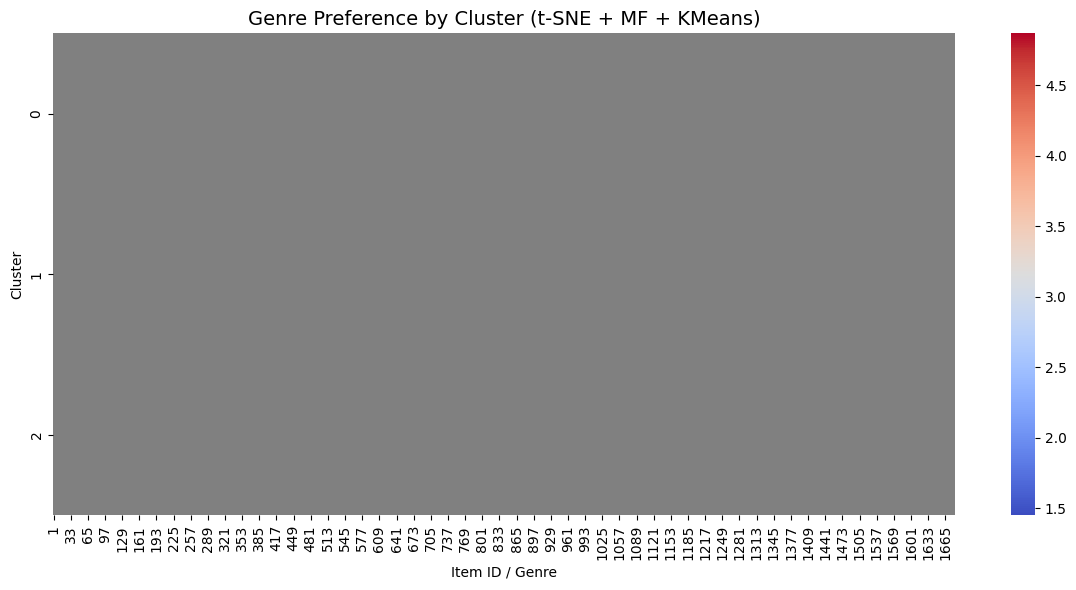

In [13]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ① 特徴量（ユーザー × アイテム MF後行列）
mf_matrix_tsne = mf_matrix.copy()
X = mf_matrix_tsne.values  # (943, 1682)

# ② t-SNE による次元削減（2次元）
tsne_embedding = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

# ③ KMeans によるクラスタリング（3クラスタ）
tsne_labels = KMeans(n_clusters=3, random_state=42, n_init=150).fit_predict(X)

# ④ クラスタラベルのコピー
mf_matrix_tsne["cluster_tsne"] = tsne_labels

# ⑤ クラスタごとの平均（ラベル列除外）
cluster_profile_tsne = mf_matrix_tsne.groupby("cluster_tsne").mean()

# ⑥ 視覚化
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile_tsne, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Genre Preference by Cluster (t-SNE + MF + KMeans)", fontsize=14)
plt.xlabel("Item ID / Genre")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


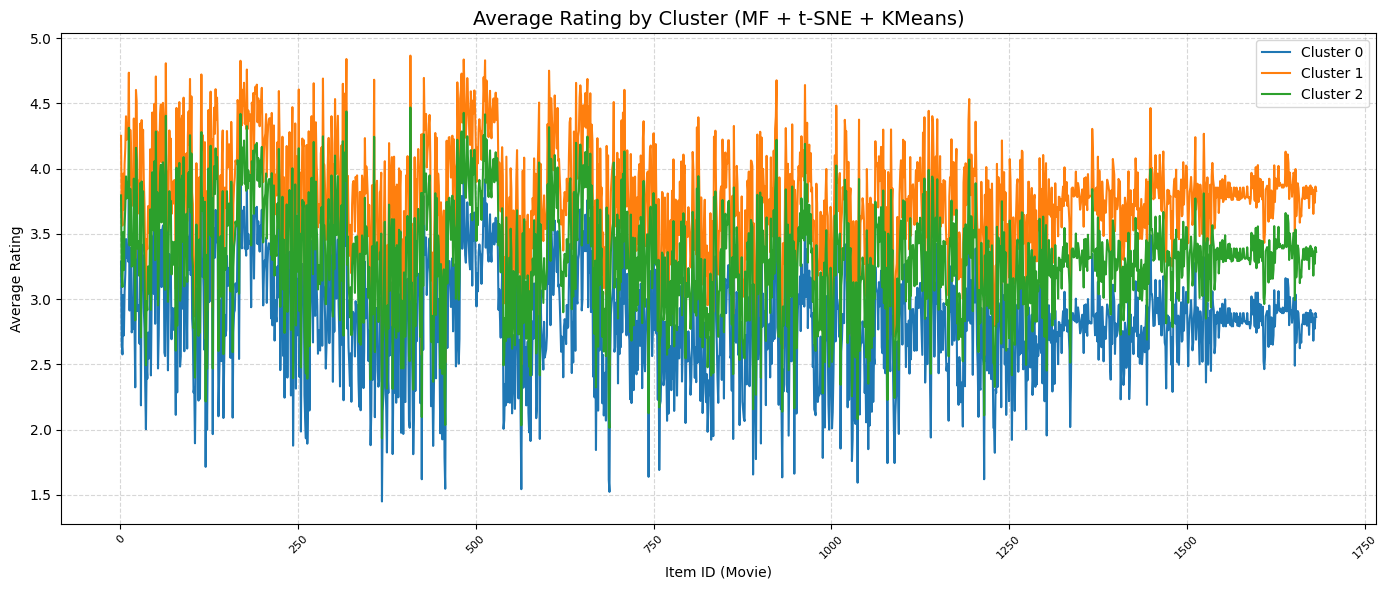

In [14]:
# 集約統計量だと分かりにくいから，折れ線グラフで可視化する

import matplotlib.pyplot as plt

# 折れ線グラフでクラスタごとの傾向を比較
plt.figure(figsize=(14, 6))

for cluster_id in cluster_profile_tsne.index:
    plt.plot(
        cluster_profile_tsne.columns,  # 横軸 = ジャンル（アイテムID）
        cluster_profile_tsne.loc[cluster_id],  # 縦軸 = 各ジャンルの平均rating
        label=f"Cluster {cluster_id}"
    )

plt.title("Average Rating by Cluster (MF + t-SNE + KMeans)", fontsize=14)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [15]:
mf_matrix_tsne.head()

1      2      3      4      5      6      7      8      9     10  \
1  4.085  3.251  3.046  3.740  3.261  3.696  4.280  3.901  4.086  3.953   
2  3.842  3.157  3.156  3.768  3.409  3.513  3.957  4.080  3.799  3.925   
3  3.285  2.654  2.600  2.977  2.751  3.098  2.939  3.417  3.323  3.368   
4  4.528  3.996  3.807  4.318  4.025  4.366  4.521  4.808  4.583  4.622   
5  3.475  3.094  2.811  3.181  2.892  3.138  3.597  3.484  3.323  3.592   

      11     12     13     14     15     16     17     18     19     20  \
1  3.564  4.644  3.725  4.079  3.485  3.628  3.272  3.563  4.142  3.657   
2  3.955  4.476  3.661  4.065  3.741  3.334  3.310  3.494  4.089  3.322   
3  3.462  3.897  2.952  3.407  3.207  2.717  2.680  2.723  3.476  2.739   
4  4.611  5.000  4.123  4.638  4.490  4.108  4.068  4.062  4.732  4.044   
5  3.431  4.048  2.815  3.273  3.211  2.937  2.861  2.960  3.371  2.836   

      21     22     23     24     25     26     27     28     29     30  \
1  2.563  4.268  4.150  3.525  3.276  3.427  3.195  4.090  2.573  3.626   
2  2.906  4.264  4.290  3.604  3.647  3.628  3.215  4.135  2.722  3.908   
3  2.292  3.616  3.605  2.840  2.951  3.059  2.713  3.477  2.071  3.434   
4  3.583  4.872  4.826  4.229  4.124  4.294  3.962  4.631  3.573  4.749   
5  2.607  3.842  3.575  3.054  2.920  2.998  2.851  3.525  2.679  3.524   

      31     32     33     34     35     36     37     38     39     40  \
1  3.676  3.842  3.417  3.200  2.720  2.508  2.842  3.052  3.403  3.086   
2  3.810  3.811  3.451  3.376  2.826  2.636  3.040  3.181  3.405  3.245   
3  3.303  3.321  3.088  2.825  2.347  1.922  2.549  2.422  2.842  2.478   
4  4.431  4.680  4.234  4.056  3.634  3.275  3.848  3.758  4.034  3.802   
5  3.086  3.358  2.935  2.704  2.395  2.139  2.507  2.803  2.884  2.614   

      41     42     43     44     45     46     47     48     49     50  ...  \
1  3.190  3.766  2.975  3.718  4.175  3.611  3.538  4.286  3.282  4.613  ...   
2  3.109  3.793  2.934  3.545  4.224  3.653  3.603  4.199  3.383  4.719  ...   
3  2.637  3.414  2.471  2.939  3.479  3.138  3.174  3.523  2.850  3.926  ...   
4  3.940  4.613  3.726  4.233  4.769  4.439  4.299  4.809  4.132  5.000  ...   
5  2.859  3.368  2.597  2.839  3.439  3.298  3.158  3.806  2.825  3.841  ...   

    1634   1635   1636   1637   1638   1639   1640   1641   1642   1643  \
1  3.444  3.705  3.444  3.452  3.414  3.624  3.477  3.585  3.695  3.571   
2  3.503  3.553  3.503  3.487  3.444  3.736  3.520  3.501  3.787  3.737   
3  2.933  2.914  2.933  2.914  2.995  3.226  2.984  2.967  3.224  3.098   
4  4.201  4.221  4.201  4.255  4.192  4.432  4.196  4.240  4.479  4.364   
5  2.988  2.769  2.988  3.004  2.933  3.226  2.878  3.042  3.121  3.338   

    1644   1645   1646   1647   1648   1649   1650   1651   1652   1653  \
1  3.314  3.514  3.592  3.455  3.270  3.471  3.699  3.585  3.005  3.536   
2  3.437  3.639  3.472  3.514  3.377  3.456  3.721  3.748  2.971  3.699   
3  2.866  3.096  2.901  3.014  2.938  2.935  3.080  3.001  2.437  3.001   
4  4.102  4.327  4.201  4.205  4.174  4.192  4.324  4.239  3.792  4.325   
5  2.979  2.986  2.957  2.928  2.743  2.921  3.087  3.161  2.868  3.197   

    1654   1655   1656   1657   1658   1659   1660   1661   1662   1663  \
1  3.199  3.304  3.312  3.584  3.152  3.137  3.354  3.401  3.347  3.182   
2  3.337  3.397  3.421  3.460  3.325  3.329  3.299  3.270  3.423  3.383   
3  2.700  2.722  2.967  2.846  2.775  2.740  2.861  2.657  2.814  2.870   
4  3.928  4.038  4.236  4.247  4.065  3.900  4.069  4.017  4.119  4.111   
5  2.825  2.867  3.080  3.140  2.768  2.737  2.846  2.728  2.751  2.868   

    1664   1665   1666   1667   1668   1669   1670   1671   1672   1673  \
1  3.328  3.481  3.374  3.409  3.551  3.270  3.444  3.444  3.352  3.444   
2  3.568  3.401  3.583  3.436  3.470  3.425  3.503  3.503  3.331  3.503   
3  3.001  2.863  2.880  2.919  2.930  2.964  2.933  2.933  2.817  2.933   
4  4.195  4.123  4.081  4.266  4.221  4.107  4.201  4.201  4.008  4.2

In [16]:
cluster_profile_tsne.head()

1         2         3         4         5         6     \
cluster_tsne                                                               
0             3.288886  2.658551  2.575886  3.031614  2.721386  3.059006   
1             4.251597  3.662484  3.563630  3.961854  3.685442  4.033955   
2             3.795281  3.186943  3.092597  3.513211  3.222209  3.560847   

                  7         8         9         10        11        12    \
cluster_tsne                                                               
0             3.193142  3.460591  3.319739  3.408034  3.287750  3.828648   
1             4.157383  4.401562  4.221276  4.342614  4.244539  4.735929   
2             3.707778  3.940743  3.772002  3.893283  3.777571  4.313542   

                  13        14        15        16        17        18    \
cluster_tsne                                                               
0             2.912318  3.390670  3.201841  2.744892  2.781841  2.769778   
1             3.869532  4.297555  4.161562  3.717101  3.744386  3.716218   
2             3.411425  3.846410  3.685087  3.248268  3.276288  3.261246   

                  19        20        21        22        23        24    \
cluster_tsne                                                               
0             3.439341  2.792074  2.323477  3.650358  3.585597  2.908176   
1             4.384614  3.767260  3.312688  4.603545  4.517552  3.839195   
2             3.923793  3.301270  2.836651  4.159599  4.066166  3.385514   

                  25        26        27        28        29        30    \
cluster_tsne                                                               
0             2.947909  2.953364  2.658193  3.379239  2.185659  3.420057   
1             3.908510  3.903721  3.651971  4.345260  3.178968  4.372412   
2             3.439789  3.441035  3.176468  3.890028  2.706497  3.901993   

                  31        32        33        34        35        36    \
cluster_tsne                                                               
0             3.073000  3.335778  2.931909  2.774648  2.337597  2.002511   
1             4.065042  4.298506  3.913532  3.727860  3.301211  2.951169   
2             3.586773  3.827111  3.439484  3.260386  2.829828  2.492688   

                  37        38        39        40        41        42    \
cluster_tsne                                                               
0             2.491364  2.390403  2.743716  2.543818  2.642773  3.220767   
1             3.460000  3.382857  3.712357  3.510620  3.612192  4.148523   
2             2.983028  2.915329  3.250431  3.043736  3.145586  3.687466   

                  43        44        45        46        47        48    \
cluster_tsne                                                               
0             2.414955  2.920114  3.482500  3.093869  3.039938  3.568682   
1             3.386997  3.876179  4.430513  4.069088  3.989990  4.497334   
2             2.917621  3.412939  3.972710  3.599434  3.525656  4.056429   

                  49        50    ...      1633      1634      1635      1636  \
cluster_tsne                      ...                                           
0             2.810773  3.801568  ...  2.919528  2.892011  2.935301  2.892011   
1             3.769782  4.706964  ...  3.870188  3.854763  3.878451  3.854763   
2             3.299102  4.284695  ...  3.406930  3.387754  3.415144  3.387754   

                  1637      1638      1639      1640      1641      1642  \
cluster_tsne                                                               
0             2.906227  2.909148  3.160369  2.907682  2.906392  3.154102   
1             3.877162  3.875744  4.130305  3.864084  3.871951  4.109445   
2             3.406776  3.405340  3.659739  3.398405  3.404444  3.642503   

                  1643      1644      1645      1646      1647      1648  \
cluster_tsne                                                               
0             3.085847  2.80013

# Spectral Clustering(2次元, k=3)

In [17]:
# MF後のデータに対してスペクトラルクラスタリングを行う
# ここで用いる行列は，user * itemのMF後の行列

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ① データの標準化（スペクトラルクラスタリングでは距離計算が重要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mf_matrix.values)

# ② スペクトラルクラスタリング
n_clusters = 3
spectral = SpectralClustering(
    n_clusters=n_clusters,
    affinity='nearest_neighbors',
    n_neighbors=10,
    assign_labels='kmeans',
    random_state=42
)
cluster_labels_spec = spectral.fit_predict(X_scaled)

# ③ クラスタラベルを mf_matrix に追加
mf_matrix_spec = mf_matrix.copy()
mf_matrix_spec["cluster_spectral"] = cluster_labels_spec

# ④ クラスタごとのアイテム平均評価（ジャンルごとの傾向）
cluster_profile_spec = mf_matrix_spec.groupby("cluster_spectral").mean()

# ⑤ クラスタ列は除外
cluster_profile_spec = cluster_profile_spec.drop(columns=["cluster_spectral"], errors="ignore")

print("cluster_profile_spec shape: ", cluster_profile_spec.shape)
cluster_profile_spec.head()

cluster_profile_spec shape:  (3, 1682)


1         2         3         4         5         6     \
cluster_spectral                                                               
0                 4.542815  3.965283  3.841435  4.206989  3.979685  4.328902   
1                 3.902532  3.298637  3.206089  3.624184  3.331357  3.672869   
2                 3.292287  2.662742  2.580596  3.035169  2.724382  3.062764   

                      7         8         9         10        11        12    \
cluster_spectral                                                               
0                 4.427217  4.658609  4.456261  4.604967  4.536435  4.933554   
1                 3.815774  4.054196  3.884642  4.002196  3.888279  4.422725   
2                 3.196725  3.463371  3.322674  3.411354  3.290466  3.831702   

                      13        14        15        16        17        18    \
cluster_spectral                                                               
0                 4.131370  4.517989  4.443891  3.998174  4.025783  4.002848   
1                 3.523220  3.961514  3.799643  3.360972  3.388590  3.368728   
2                 2.915815  3.394118  3.206416  2.748073  2.785382  2.772876   

                      19        20        21        22        23        24    \
cluster_spectral                                                               
0                 4.655228  4.033815  3.612391  4.863402  4.754337  4.117957   
1                 4.035012  3.414624  2.949248  4.267156  4.179300  3.493777   
2                 3.443607  2.796916  2.326287  3.653831  3.588612  2.910663   

                      25        26        27        28        29        30    \
cluster_spectral                                                               
0                 4.214587  4.176533  3.943880  4.646620  3.483348  4.636272   
1                 3.548991  3.553140  3.289832  3.995522  2.817312  4.017822   
2                 2.951140  2.955444  2.661539  3.382775  2.188545  3.422006   

                      31        32        33        34        35        36    \
cluster_spectral                                                               
0                 4.356641  4.559804  4.177957  3.999891  3.583935  3.228185   
1                 3.701120  3.943299  3.556155  3.373802  2.943076  2.602848   
2                 3.076096  3.338983  2.935073  2.777961  2.340837  2.004697   

                      37        38        39        40        41        42    \
cluster_spectral                                                               
0                 3.744326  3.705326  3.987728  3.807380  3.915239  4.415076   
1                 3.097886  3.021961  3.361692  3.153600  3.254722  3.799776   
2                 2.494466  2.393803  2.746955  2.547225  2.645376  3.223096   

                      43        44        45        46        47        48    \
cluster_spectral                                                               
0                 3.680380  4.170978  4.701207  4.352891  4.259576  4.753370   
1                 3.028746  3.521952  4.083134  3.712192  3.638256  4.163574   
2                 2.418393  2.923247  3.486135  3.096455  3.043792  3.571758   

                      49        50    ...      1633      1634      1635  \
cluster_spectral                      ...                                 
0                 4.045533  4.894804  ...  4.149728  4.135337  4.154174   
1                 3.413089  4.395526  ...  3.518080  3.499954  3.526449   
2                 2.813927  3.803287  ...  2.922433  2.895056  2.939567   

                      1636      1637      1638      1639      1640      1641  \
cluster_spectral                                                               
0                 4.135337  4.158424  4.154109  4.424011  4.148163  4.148141   
1                 3.499954  3.520070  3.519000  3.771244  3.509737  3.517282   
2                 2.895056  2.908933  2.911938  3.163612  2.910528  2.909921   

                      1642      1643 

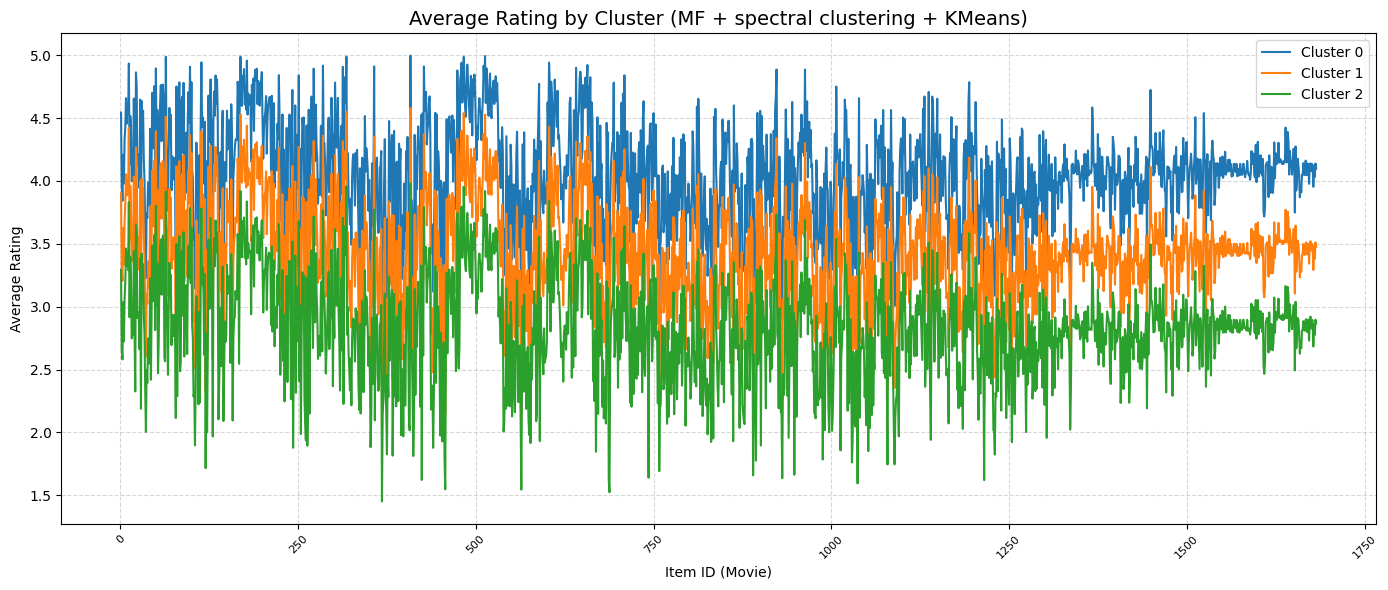

In [18]:
# 集約統計量だと分かりにくいから，折れ線グラフで可視化する

import matplotlib.pyplot as plt

# 折れ線グラフでクラスタごとの傾向を比較
plt.figure(figsize=(14, 6))

for cluster_id in cluster_profile_spec.index:
    plt.plot(
        cluster_profile_spec.columns,  # 横軸 = 映画（アイテムID）
        cluster_profile_spec.loc[cluster_id],  # 縦軸 = 各映画の平均rating
        label=f"Cluster {cluster_id}"
    )

plt.title("Average Rating by Cluster (MF + spectral clustering + KMeans)", fontsize=14)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# PCA(2次元) and k-means(k=3)

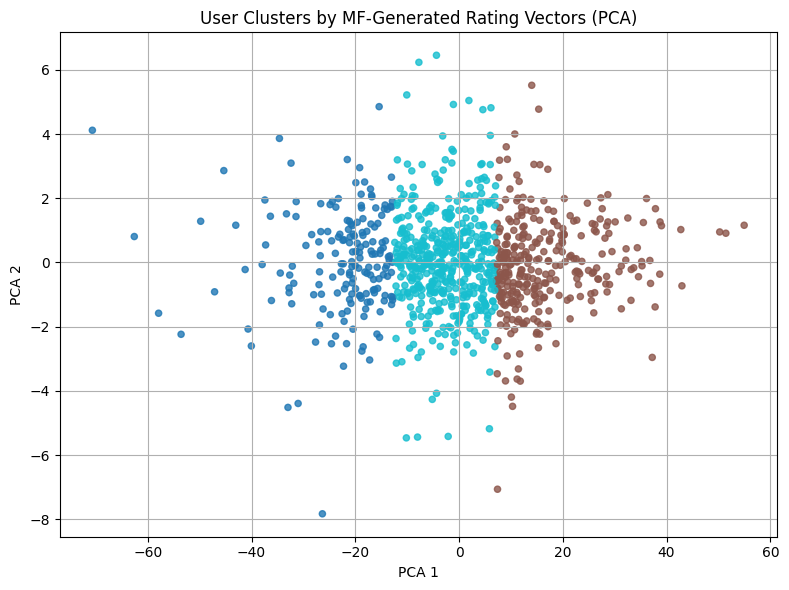

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# コピーして安全に処理
mf_matrix_pca = mf_matrix.copy()
X = mf_matrix.values

# 次元圧縮（PCA, 2次元）
pca_embedding = PCA(n_components=2, random_state=42).fit_transform(X)

# クラスタリング（KMeans, 3クラスタ）
pca_labels = KMeans(n_clusters=3, random_state=42, n_init=150).fit_predict(X)

# クラスタの散布図
plt.figure(figsize=(8, 6))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=pca_labels, cmap='tab10', s=20, alpha=0.8)
plt.title("User Clusters by MF-Generated Rating Vectors (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

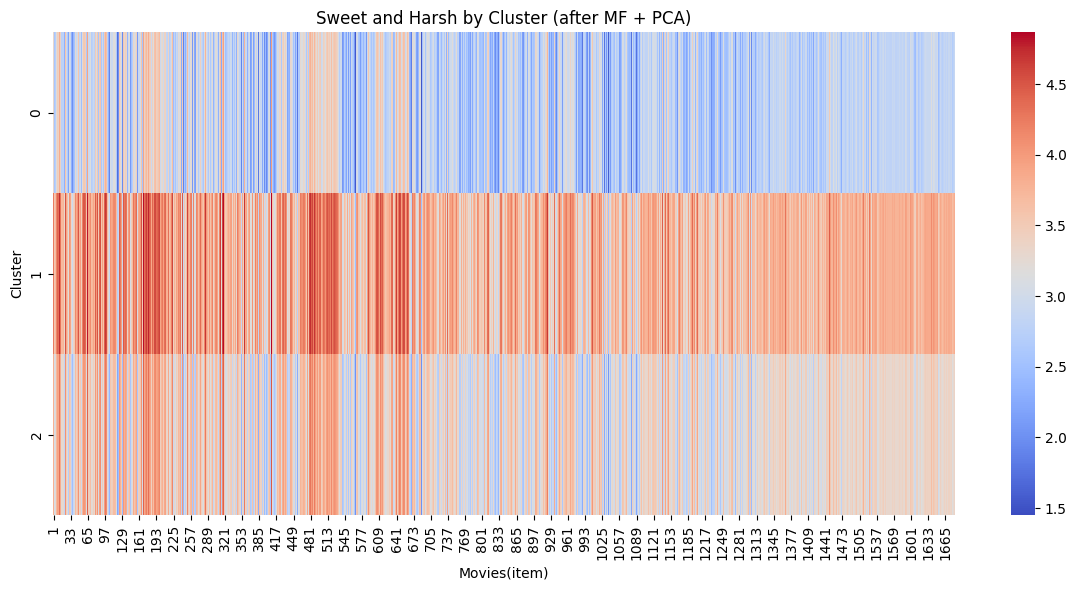

In [20]:
# クラスタ列を追加
mf_matrix_pca['cluster_pca'] = pca_labels

# クラスタごとの平均プロファイルを集計（列=各アイテムの評価）
cluster_profile_pca = mf_matrix_pca.groupby('cluster_pca').mean()

# ヒートマップで可視化
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile_pca, fmt=".2f", cmap="coolwarm")
plt.title("Sweet and Harsh by Cluster (after MF + PCA)")
plt.xlabel("Movies(item)")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

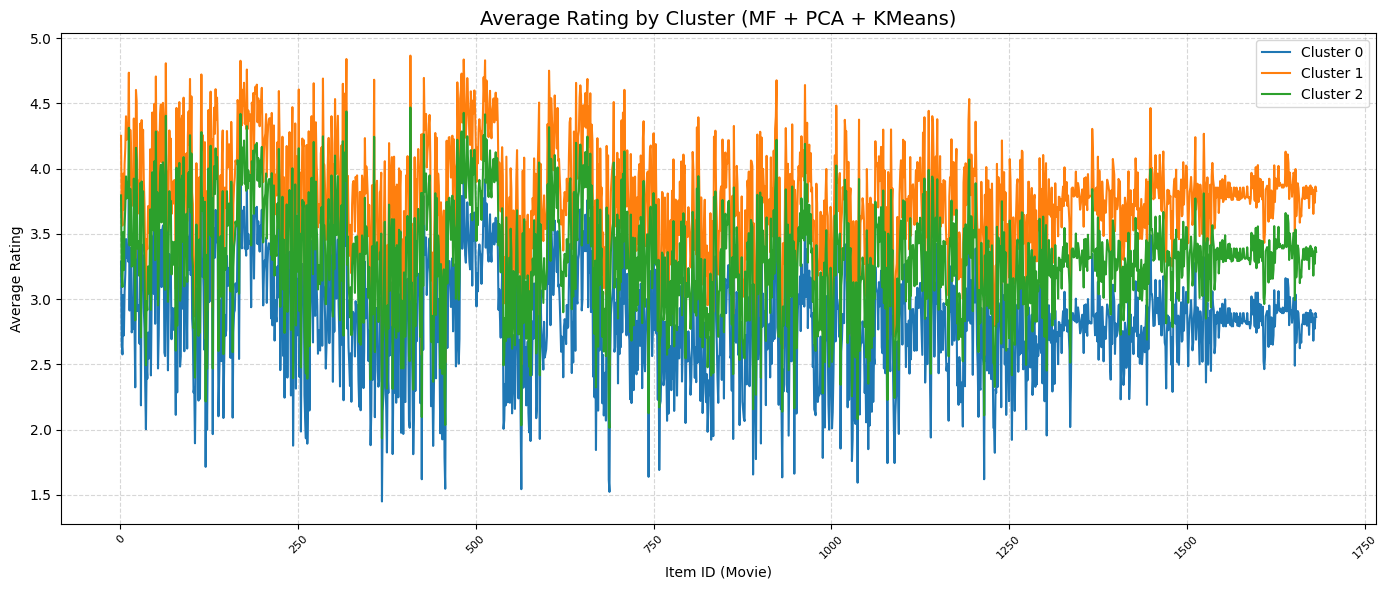

In [21]:
# 折れ線グラフで可視化
plt.figure(figsize=(14, 6))

for cluster_id in cluster_profile_pca.index:
    plt.plot(
        cluster_profile_pca.columns,
        cluster_profile_pca.loc[cluster_id],
        label=f"Cluster {cluster_id}"
    )

plt.title("Average Rating by Cluster (MF + PCA + KMeans)", fontsize=14)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# 4つの手法の比較

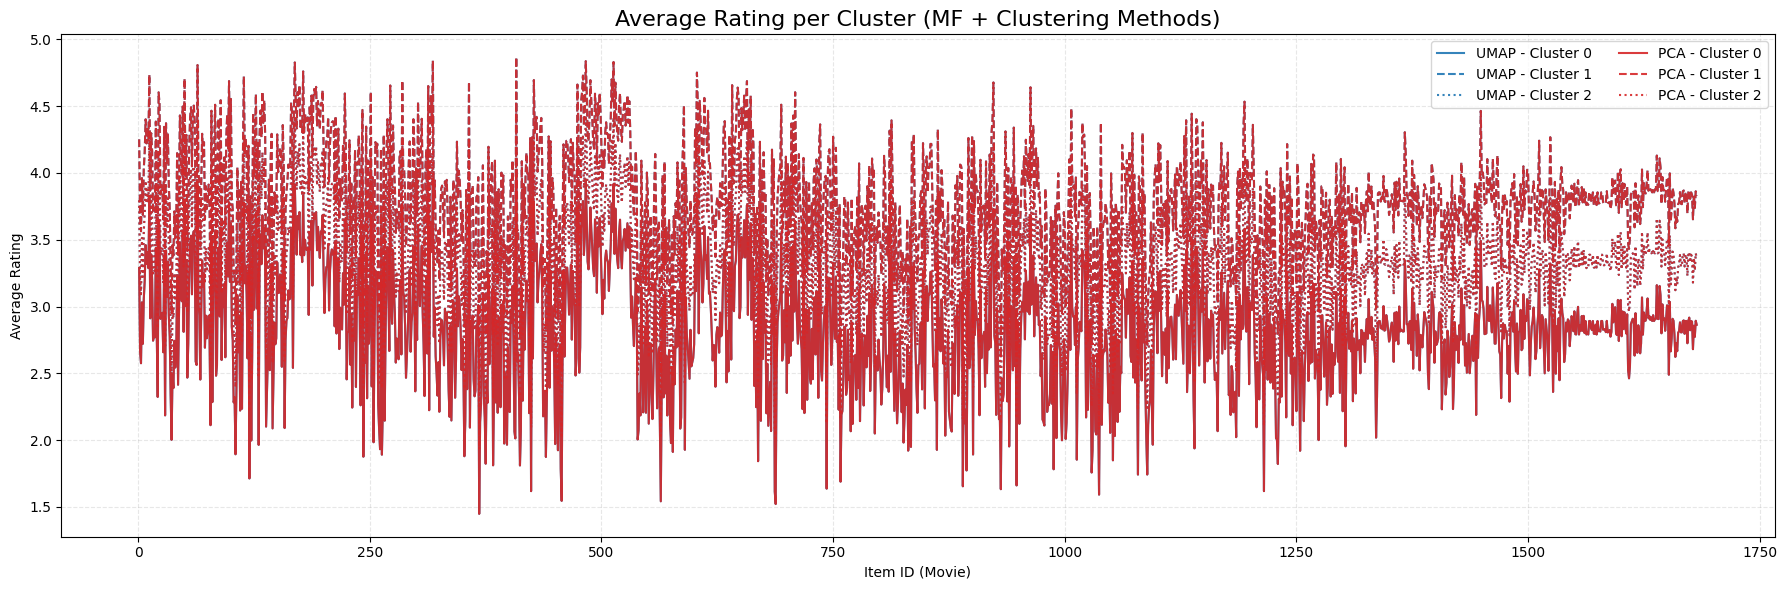

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# 手法ごとの色（全クラスタで共通）
method_colors = {
    "UMAP":     "tab:blue",
    # "t-SNE":    "tab:orange",
    # "Spectral": "tab:green",
    "PCA":      "tab:red"
}

# クラスタ番号ごとの線種
cluster_linestyles = {
    0: "-",
    1: "--",
    2: ":"
}

# 各手法の設定：DataFrame
methods = [
    ("UMAP",     cluster_profile_umap),
    # ("t-SNE",    cluster_profile_tsne),
    # ("Spectral", cluster_profile_spec),
    ("PCA",      cluster_profile_pca)
]

# 各手法 × クラスタを描画
for method_name, profile_df in methods:
    for cluster_id in profile_df.index:
        plt.plot(
            profile_df.columns,
            profile_df.loc[cluster_id],
            label=f"{method_name} - Cluster {cluster_id}",
            color=method_colors[method_name],
            linestyle=cluster_linestyles[cluster_id],
            alpha=0.9
        )

# グラフ設定
plt.title("Average Rating per Cluster (MF + Clustering Methods)", fontsize=16)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


# PCAとt-SNE, UMAPが同じ

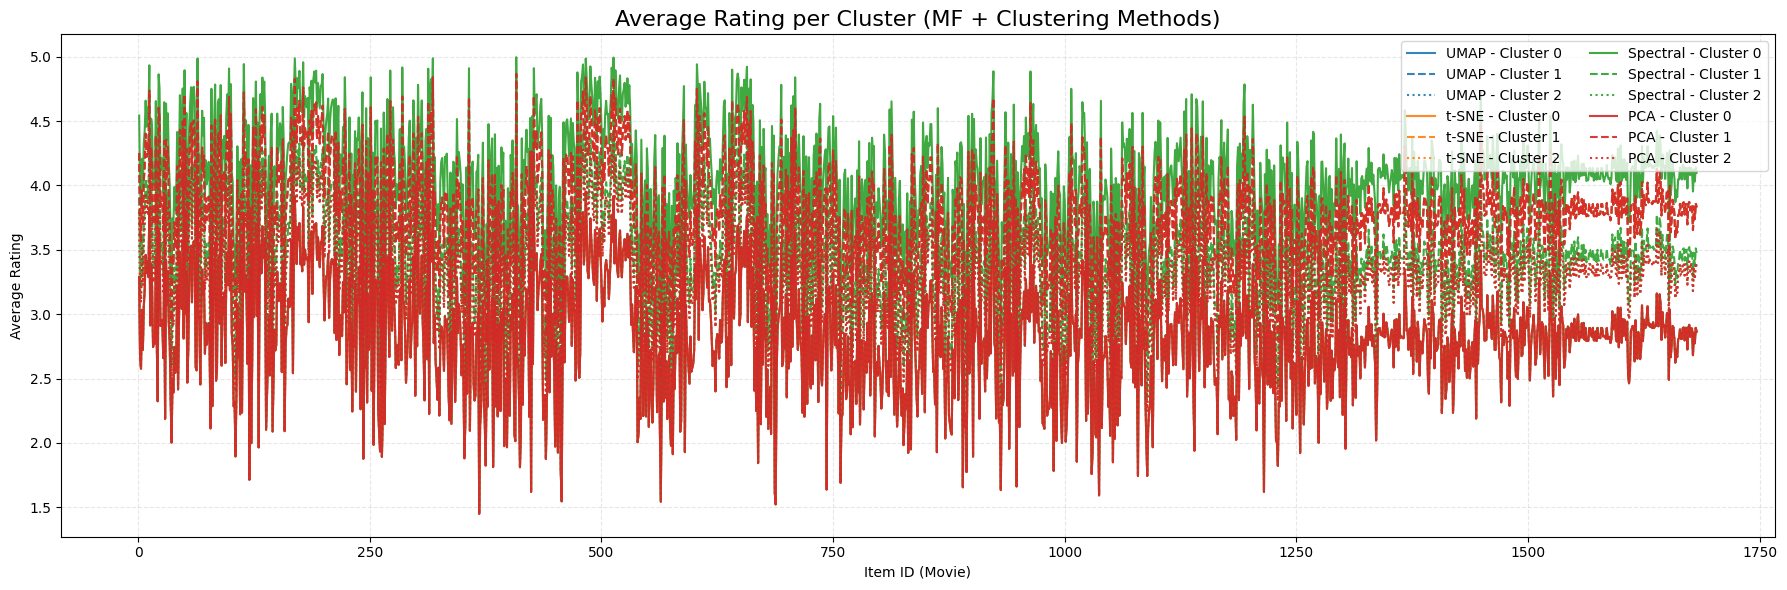

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# 手法ごとの色
method_colors = {
    "UMAP":     "tab:blue",
    "t-SNE":    "tab:orange",
    "Spectral": "tab:green",
    "PCA":      "tab:red"
}

# クラスタごとの線種
cluster_linestyles = {
    0: "-",
    1: "--",
    2: ":"
}

# 共通の列順に統一
common_columns = cluster_profile_pca.columns
cluster_profile_umap = cluster_profile_umap[common_columns]
cluster_profile_tsne = cluster_profile_tsne[common_columns]
cluster_profile_spec = cluster_profile_spec[common_columns]

# 手法一覧
methods = [
    ("UMAP",     cluster_profile_umap),
    ("t-SNE",    cluster_profile_tsne),
    ("Spectral", cluster_profile_spec),
    ("PCA",      cluster_profile_pca)
]

# 描画
for method_name, profile_df in methods:
    for cluster_id in profile_df.index:
        plt.plot(
            profile_df.columns,
            profile_df.loc[cluster_id],
            label=f"{method_name} - Cluster {cluster_id}",
            color=method_colors[method_name],
            linestyle=cluster_linestyles[cluster_id],
            linewidth=1.5,
            alpha=0.9
        )

plt.title("Average Rating per Cluster (MF + Clustering Methods)", fontsize=16)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.manifold import SpectralEmbedding

# 次元削減元データ（ユーザー × アイテムのMFベクトル）
X = mf_matrix.values

# 次元削減（2次元）をそれぞれ実行
embedding_pca = PCA(n_components=2, random_state=42).fit_transform(X)
embedding_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)
embedding_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
embedding_spectral = SpectralEmbedding(n_components=2, random_state=42).fit_transform(X)

# DataFrame化してdescribeを表示
df_pca = pd.DataFrame(embedding_pca, columns=['PC1', 'PC2'])
df_tsne = pd.DataFrame(embedding_tsne, columns=['tSNE1', 'tSNE2'])
df_umap = pd.DataFrame(embedding_umap, columns=['UMAP1', 'UMAP2'])
df_spectral = pd.DataFrame(embedding_spectral, columns=['Spectral1', 'Spectral2'])

# describeの出力
print("PCA describe:")
print(df_pca.describe())
print("\n")

print("t-SNE describe:")
print(df_tsne.describe())
print("\n")

print("UMAP describe:")
print(df_umap.describe())
print("\n")

print("Spectral Embedding describe:")
print(df_spectral.describe())

PCA describe:
                PC1           PC2
count  9.430000e+02  9.430000e+02
mean   4.219554e-16 -2.863269e-16
std    1.576327e+01  1.560398e+00
min   -7.067740e+01 -7.830782e+00
25%   -9.464740e+00 -9.273722e-01
50%    1.285993e-01 -5.335954e-02
75%    9.792294e+00  8.944100e-01
max    5.495928e+01  6.457547e+00


t-SNE describe:
            tSNE1       tSNE2
count  943.000000  943.000000
mean    -0.295984   -0.117561
std     37.699474    2.710393
min    -70.690643   -7.460259
25%    -30.359032   -1.696414
50%     -0.655369   -0.015893
75%     31.090977    1.756366
max     71.201691    6.343995


UMAP describe:
            UMAP1       UMAP2
count  943.000000  943.000000
mean     6.383257    1.977253
std      6.115585    3.341904
min     -1.891353   -2.037967
25%      0.623840   -0.752682
50%      5.379167    0.861091
75%     11.750739    3.933160
max     18.254160   11.246059


Spectral Embedding describe:
        Spectral1   Spectral2
count  943.000000  943.000000
mean     0.000

In [25]:
df_pca.head()

PC1       PC2
0  -0.204600 -1.893116
1   2.147762 -0.756108
2 -21.102679 -0.385810
3  30.843235 -0.283963
4 -18.869487  2.127542

In [26]:
df_tsne.head()

tSNE1     tSNE2
0   0.850548  2.797584
1   2.756125  2.950821
2 -55.513359  0.727584
3  65.491379  0.316657
4 -51.201656  4.840973

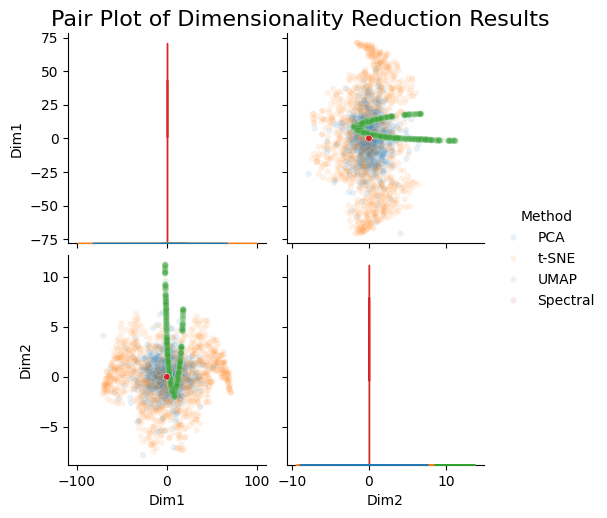

In [27]:
# 上の数値の結果を解釈する．

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 各手法のDataFrameを整形
df_pca = pd.DataFrame(embedding_pca, columns=['Dim1', 'Dim2'])
df_pca['Method'] = 'PCA'

df_tsne = pd.DataFrame(embedding_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Method'] = 't-SNE'

df_umap = pd.DataFrame(embedding_umap, columns=['Dim1', 'Dim2'])
df_umap['Method'] = 'UMAP'

df_spectral = pd.DataFrame(embedding_spectral, columns=['Dim1', 'Dim2'])
df_spectral['Method'] = 'Spectral'

# すべて結合
df_all = pd.concat([df_pca, df_tsne, df_umap, df_spectral], axis=0)

# pairplotで分布比較
sns.pairplot(
    df_all,
    hue='Method',
    diag_kind='kde',
    plot_kws={'alpha': 0.1, 's': 20},
    palette='tab10'
)

plt.suptitle("Pair Plot of Dimensionality Reduction Results", fontsize=16, y=1.02)
plt.show()


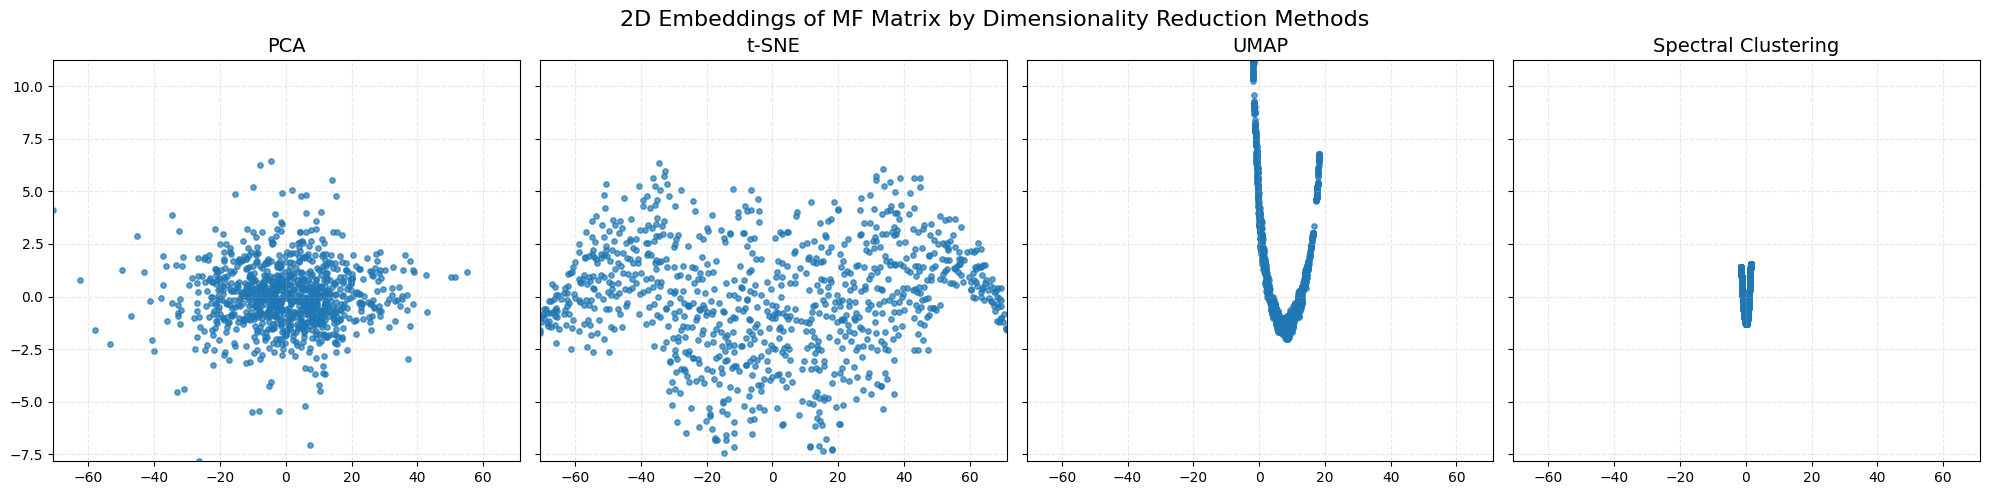

In [28]:
# Spectral Clusteringのスケールが小さくて比較できないからrescalingする

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 必要に応じてSpectralのみスケーリング（他の手法と比較するため）
embedding_spectral_scaled = StandardScaler().fit_transform(embedding_spectral)

# 埋め込み結果とタイトルのセット
embeddings = {
    "PCA()": embedding_pca,
    "t-SNE": embedding_tsne,
    "UMAP": embedding_umap,
    "Spectral Clustering": embedding_spectral_scaled  # スケーリング済み
}

# 共通スケール設定のため、全データの範囲を取得
all_concat = np.vstack(list(embeddings.values()))
x_min, x_max = all_concat[:, 0].min(), all_concat[:, 0].max()
y_min, y_max = all_concat[:, 1].min(), all_concat[:, 1].max()

# プロット
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

for ax, (name, data) in zip(axes, embeddings.items()):
    ax.scatter(data[:, 0], data[:, 1], s=15, alpha=0.7)
    ax.set_title(name, fontsize=14)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle="--", alpha=0.3)

fig.suptitle("2D Embeddings of MF Matrix by Dimensionality Reduction Methods", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # タイトルがかぶらないように調整
plt.show()

In [29]:
# 横軸が1次元目で，縦軸が2次元目

# KernelPCAに関して

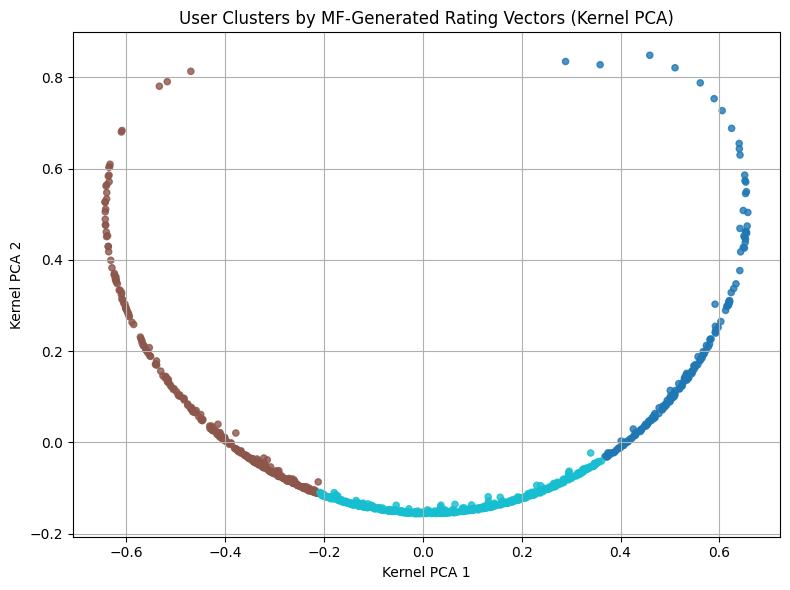

In [30]:
# PCAは線形構造を捉えるため，データが非線形構造であるという仮説からカーネルPCAを行う

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# コピーして安全に処理
mf_matrix_kpca = mf_matrix.copy()
X = mf_matrix.values

# カーネルPCAによる次元圧縮（2次元, RBFカーネル）
kpca_embedding = KernelPCA(n_components=2, kernel='rbf', gamma=0.0005, random_state=42).fit_transform(X)

# クラスタリング（KMeans, 3クラスタ）
kpca_labels = KMeans(n_clusters=3, random_state=42, n_init=150).fit_predict(X)

# クラスタの散布図
plt.figure(figsize=(8, 6))
plt.scatter(kpca_embedding[:, 0], kpca_embedding[:, 1], c=kpca_labels, cmap='tab10', s=20, alpha=0.8)
plt.title("User Clusters by MF-Generated Rating Vectors (Kernel PCA)")
plt.xlabel("Kernel PCA 1")
plt.ylabel("Kernel PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


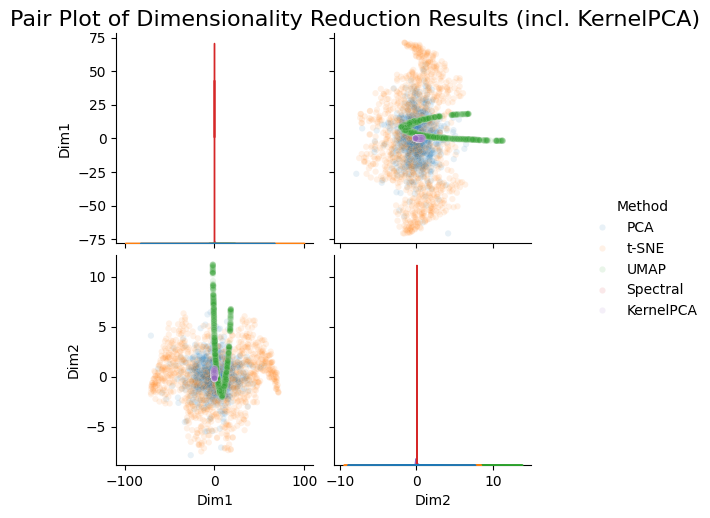

In [31]:
# カーネルPCAも追加して比較する

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# カーネルPCAによる2次元埋め込み（RBFカーネル）
embedding_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0005, random_state=42).fit_transform(X)

# 各手法のDataFrameを整形
df_pca = pd.DataFrame(embedding_pca, columns=['Dim1', 'Dim2'])
df_pca['Method'] = 'PCA'

df_tsne = pd.DataFrame(embedding_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Method'] = 't-SNE'

df_umap = pd.DataFrame(embedding_umap, columns=['Dim1', 'Dim2'])
df_umap['Method'] = 'UMAP'

df_spectral = pd.DataFrame(embedding_spectral, columns=['Dim1', 'Dim2'])
df_spectral['Method'] = 'Spectral'

df_kpca = pd.DataFrame(embedding_kpca, columns=['Dim1', 'Dim2'])
df_kpca['Method'] = 'KernelPCA'

# すべて結合
df_all = pd.concat([df_pca, df_tsne, df_umap, df_spectral, df_kpca], axis=0)

# pairplotで分布比較
sns.pairplot(
    df_all,
    hue='Method',
    diag_kind='kde',
    plot_kws={'alpha': 0.1, 's': 20},
    palette='tab10'
)

plt.suptitle("Pair Plot of Dimensionality Reduction Results (incl. KernelPCA)", fontsize=16, y=1.02)
plt.show()


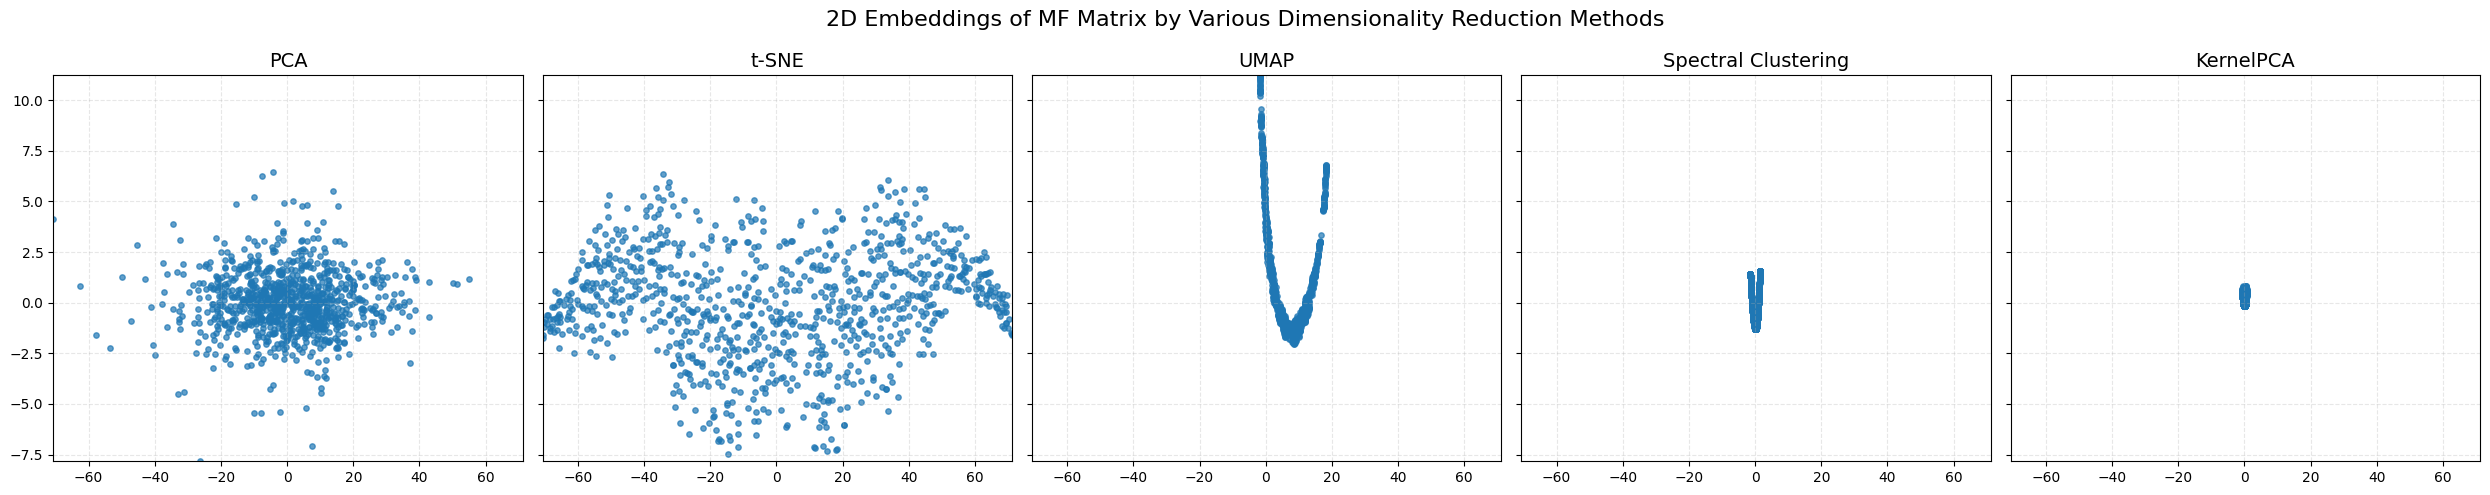

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# もとのMF行列
X = mf_matrix.values

# KernelPCA埋め込み（非線形）
embedding_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0005, random_state=42).fit_transform(X)

# Spectralだけrescale（範囲が極端に小さいため）
embedding_spectral_scaled = StandardScaler().fit_transform(embedding_spectral)

# 5手法の埋め込み結果とタイトルのセット
embeddings = {
    "PCA": embedding_pca,
    "t-SNE": embedding_tsne,
    "UMAP": embedding_umap,
    "Spectral Clustering": embedding_spectral_scaled,
    "KernelPCA": embedding_kpca
}

# 共通スケールの範囲を取得
all_concat = np.vstack(list(embeddings.values()))
x_min, x_max = all_concat[:, 0].min(), all_concat[:, 0].max()
y_min, y_max = all_concat[:, 1].min(), all_concat[:, 1].max()

# プロット
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True, sharey=True)

for ax, (name, data) in zip(axes, embeddings.items()):
    ax.scatter(data[:, 0], data[:, 1], s=15, alpha=0.7)
    ax.set_title(name, fontsize=14)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle="--", alpha=0.3)

fig.suptitle("2D Embeddings of MF Matrix by Various Dimensionality Reduction Methods", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # タイトルが重ならないように調整
plt.show()


In [41]:
# カーネルPCAはgamma(ハイパーパラメータ)の調整が重要である
# gamma: 小さい -> データ点同士の距離が多少離れていても同じグループとする
#        大きい -> データ点同士の距離が多少離れていると異なるグループとする
# gammaの最適値を求める

# 方針
"""
①複数のgamma値(0.0001~1.0)でKernelPCAを実行する
②射影後の2次元空間に対してk-meansを行う
③エルボ法とシルエット分析を行う(シルエットスコアが最大となるkを選択する)
"""

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

gammas = np.logspace(-4, 0, 10)  # gamma = 1e-4 〜 1.0 を対数スケールで試す
scores = []

for gamma in gammas:
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, random_state=42)
    X_kpca = kpca.fit_transform(X)  # X = mf_matrix.values

    labels = KMeans(n_clusters=3, random_state=42).fit_predict(X_kpca)
    score = silhouette_score(X_kpca, labels)
    scores.append((gamma, score))

# 結果表示
for gamma, score in scores:
    print(f"gamma = {gamma:.5f} → Silhouette Score = {score:.4f}")

gamma = 0.00010 → Silhouette Score = 0.5133
gamma = 0.00028 → Silhouette Score = 0.5055
gamma = 0.00077 → Silhouette Score = 0.5038
gamma = 0.00215 → Silhouette Score = 0.4981
gamma = 0.00599 → Silhouette Score = 0.4863
gamma = 0.01668 → Silhouette Score = 0.4879
gamma = 0.04642 → Silhouette Score = 0.4926
gamma = 0.12915 → Silhouette Score = 0.5564
gamma = 0.35938 → Silhouette Score = 0.7807
gamma = 1.00000 → Silhouette Score = 0.9860



Best gamma = 1.00000 → Silhouette Score = 0.9860


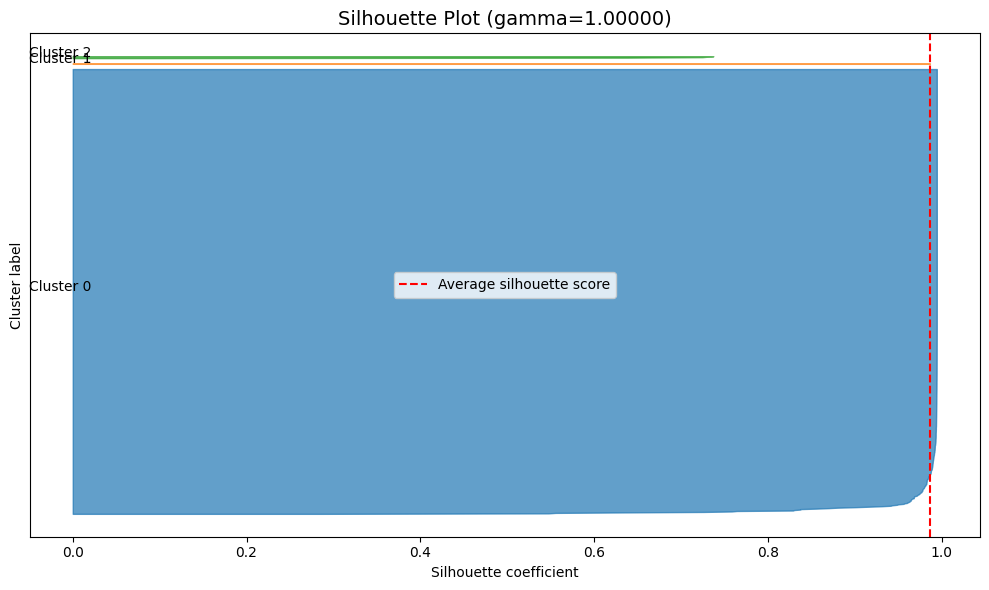

In [46]:
# gammaは高いほど良いことが常に正しいとは限らないため，シルエット分析を用いて各clusterのデータ量(clusterの偏り)を調べる

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# ---------- 準備 ----------
X = mf_matrix.values
gammas = np.logspace(-4, 0, 10)
scores = []
labels_dict = {}
X_kpca_dict = {}

# ---------- gammaを変えて評価 ----------
for gamma in gammas:
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, random_state=42)
    X_kpca = kpca.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_kpca)

    score = silhouette_score(X_kpca, labels)

    scores.append((gamma, score))
    labels_dict[gamma] = labels
    X_kpca_dict[gamma] = X_kpca

# ---------- 最も良いgammaを選択 ----------
best_gamma, best_score = max(scores, key=lambda x: x[1])
print(f"\nBest gamma = {best_gamma:.5f} → Silhouette Score = {best_score:.4f}")

# ---------- シルエット分析の可視化 ----------
X_best = X_kpca_dict[best_gamma]
labels_best = labels_dict[best_gamma]
n_clusters = 3

# シルエットスコアをサンプルごとに計算
silhouette_vals = silhouette_samples(X_best, labels_best)

# プロット
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    ith_cluster_vals = silhouette_vals[labels_best == i]
    ith_cluster_vals.sort()

    size_cluster_i = ith_cluster_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.tab10(i)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_vals, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")
    y_lower = y_upper + 10

ax.axvline(best_score, color="red", linestyle="--", label="Average silhouette score")
ax.set_title(f"Silhouette Plot (gamma={best_gamma:.5f})", fontsize=14)
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")
ax.set_yticks([])
ax.legend()
plt.tight_layout()
plt.show()


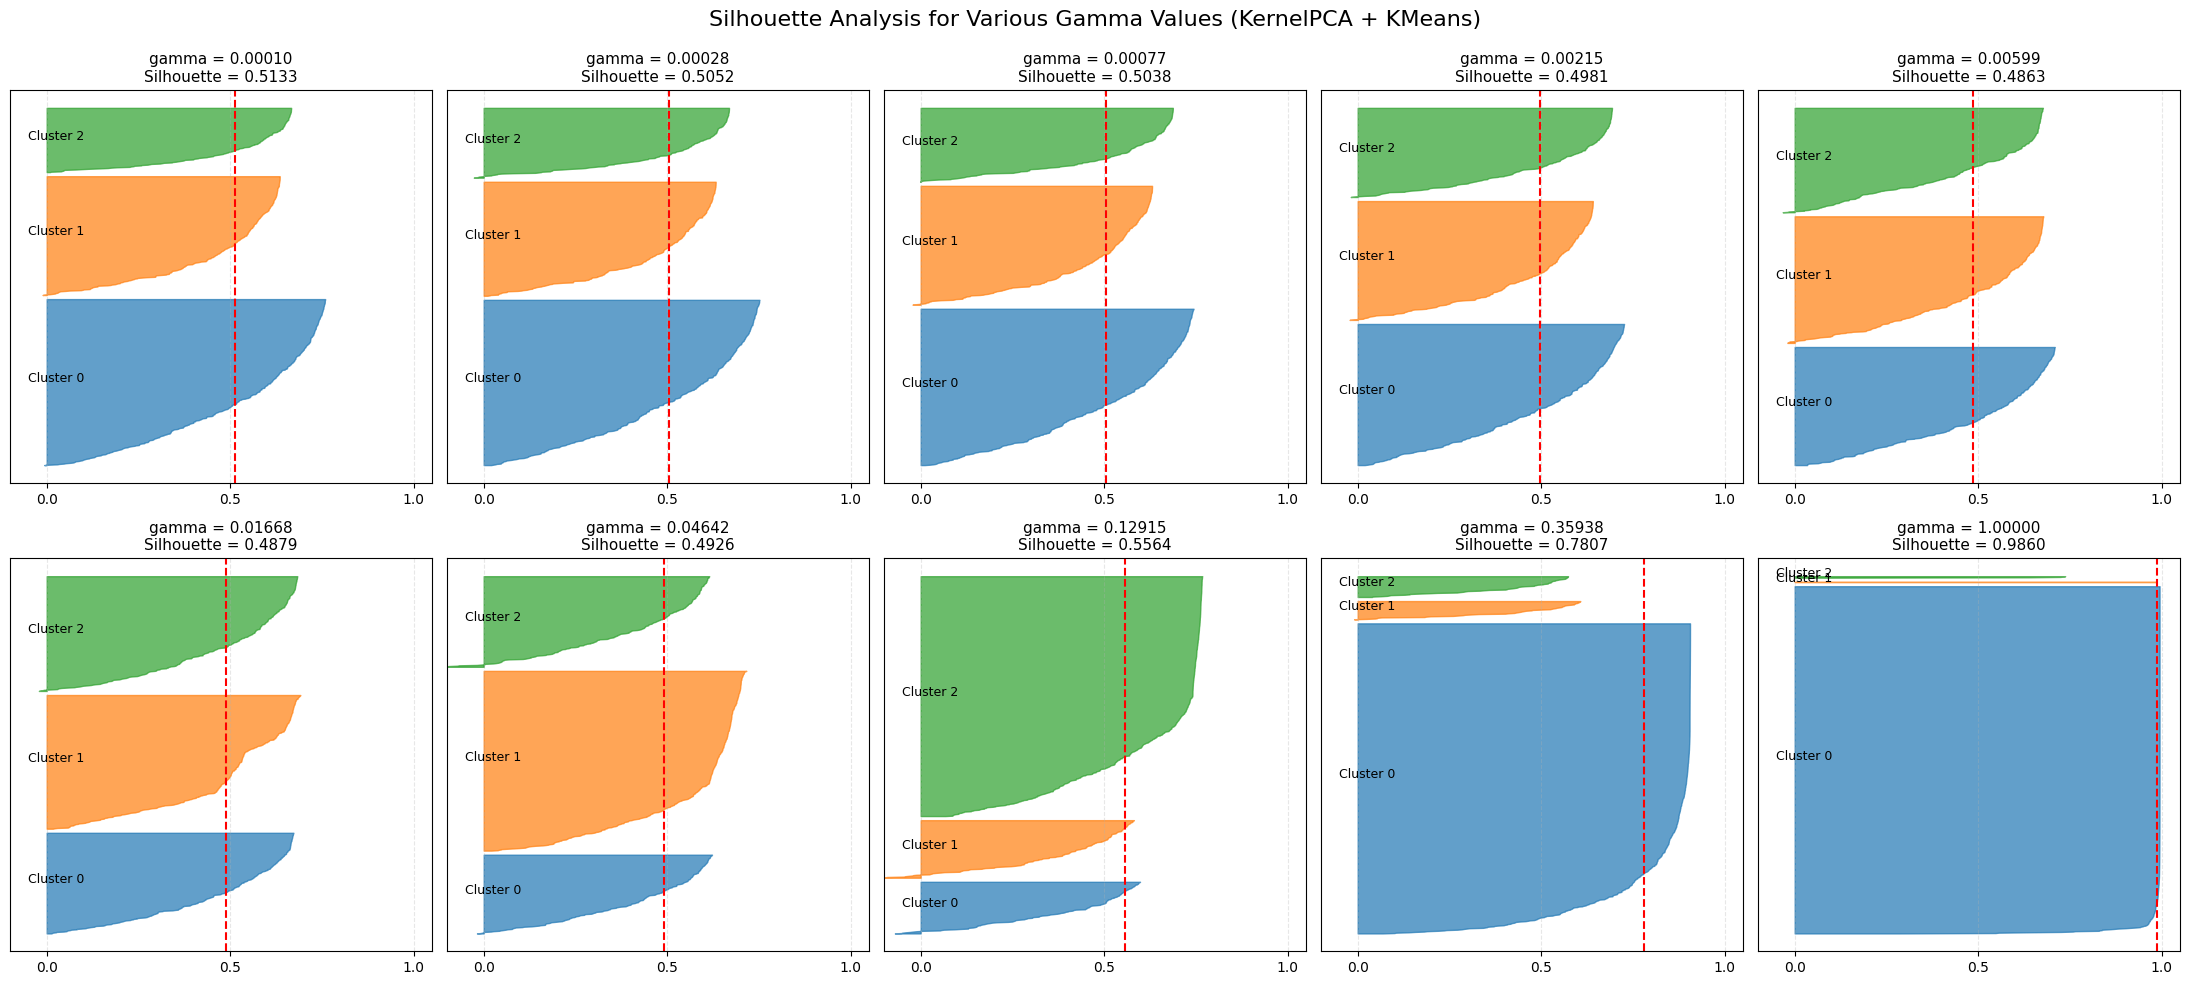

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# ----- 対象gamma値 -----
gammas = [0.00010, 0.00028, 0.00077, 0.00215, 0.00599,
          0.01668, 0.04642, 0.12915, 0.35938, 1.00000]

X = mf_matrix.values
n_clusters = 3
colors = cm.tab10.colors

# ----- subplot設定 -----
fig, axes = plt.subplots(2, 5, figsize=(22, 10))
axes = axes.flatten()

# ----- 各gammaごとに処理 -----
for i, gamma in enumerate(gammas):
    # KernelPCA + KMeans
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, random_state=42)
    X_kpca = kpca.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_kpca)

    silhouette_vals = silhouette_samples(X_kpca, cluster_labels)
    avg_score = silhouette_score(X_kpca, cluster_labels)

    # シルエットプロット
    ax = axes[i]
    y_lower = 10
    for j in range(n_clusters):
        vals = silhouette_vals[cluster_labels == j]
        vals.sort()
        size = len(vals)
        y_upper = y_lower + size

        color = colors[j % 10]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size, f"Cluster {j}", fontsize=9)
        y_lower = y_upper + 10

    ax.axvline(avg_score, color='red', linestyle='--', linewidth=1.5)
    ax.set_title(f"gamma = {gamma:.5f}\nSilhouette = {avg_score:.4f}", fontsize=11)
    ax.set_xlim([-0.1, 1.05])
    ax.set_yticks([])
    ax.set_xticks([0.0, 0.5, 1.0])
    ax.grid(True, linestyle="--", alpha=0.3)

# レイアウト調整
fig.suptitle("Silhouette Analysis for Various Gamma Values (KernelPCA + KMeans)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


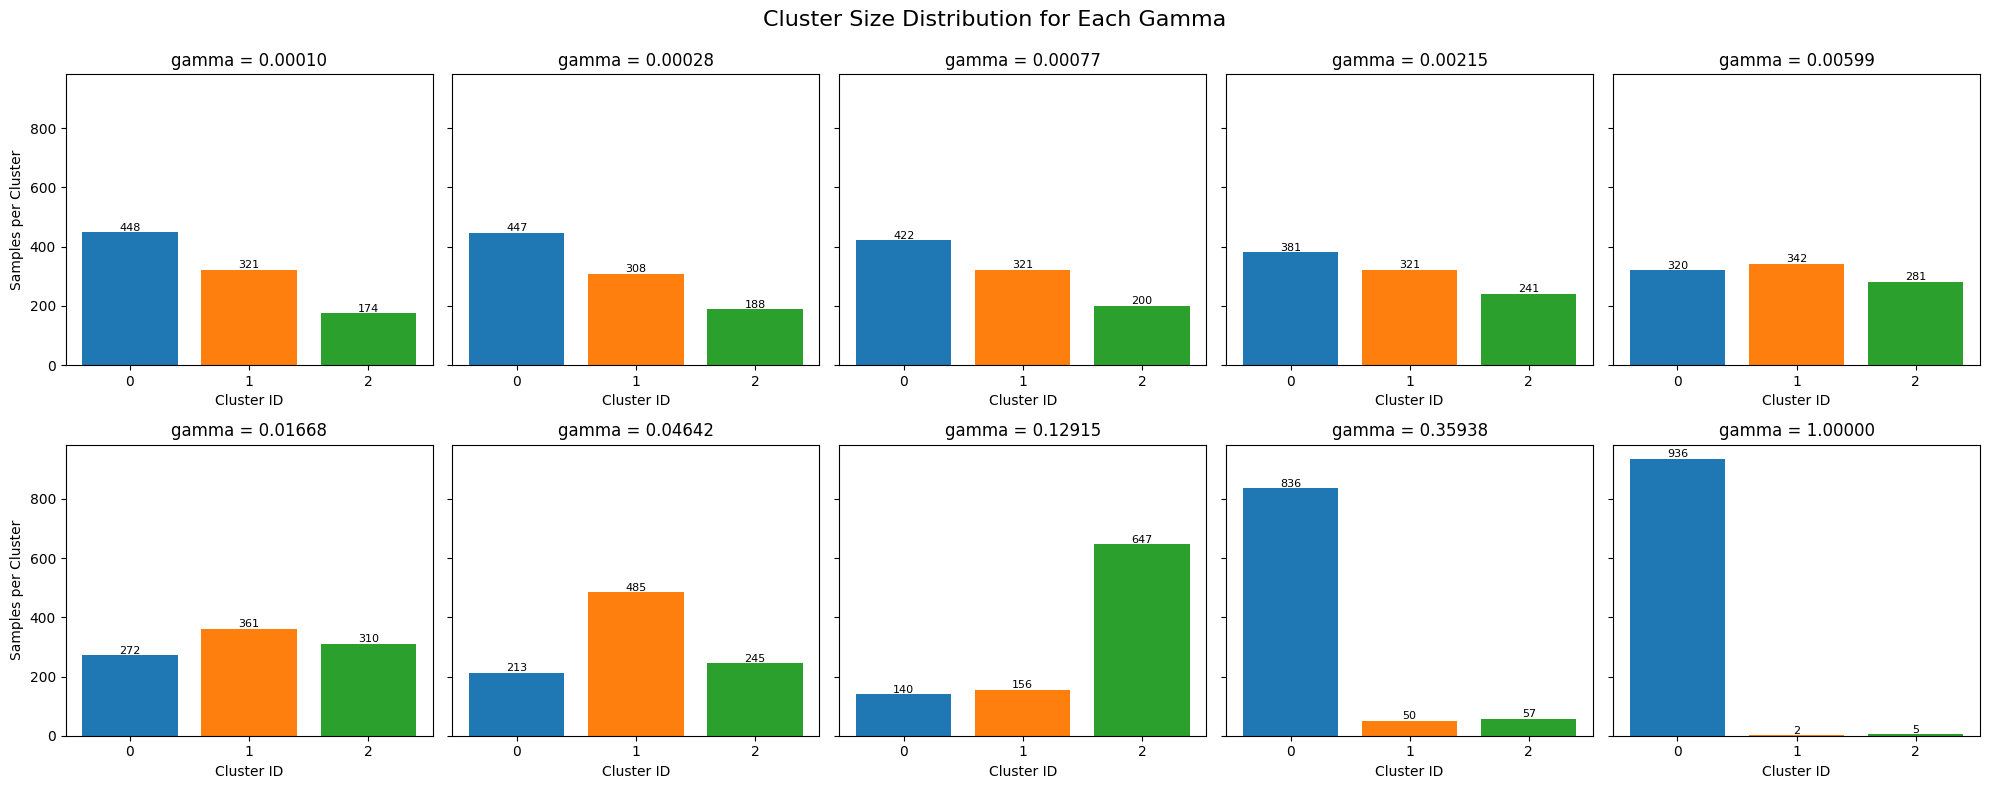

In [47]:
# ---------- 各gammaにおけるクラスタのサイズを可視化 ----------
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharey=True)
axes = axes.flatten()

for idx, gamma in enumerate(gammas):
    labels = labels_dict[gamma]
    counts = np.bincount(labels, minlength=n_clusters)

    ax = axes[idx]
    bars = ax.bar(range(n_clusters), counts, color=[cm.tab10(i) for i in range(n_clusters)])
    ax.set_title(f"gamma = {gamma:.5f}")
    ax.set_xticks(range(n_clusters))
    ax.set_xlabel("Cluster ID")
    if idx % 5 == 0:
        ax.set_ylabel("Samples per Cluster")
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval}', ha='center', fontsize=8)

fig.suptitle("Cluster Size Distribution for Each Gamma", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [ ]:
# KernelPCAにおけるgammaの値は
# 0.00215が良さそう

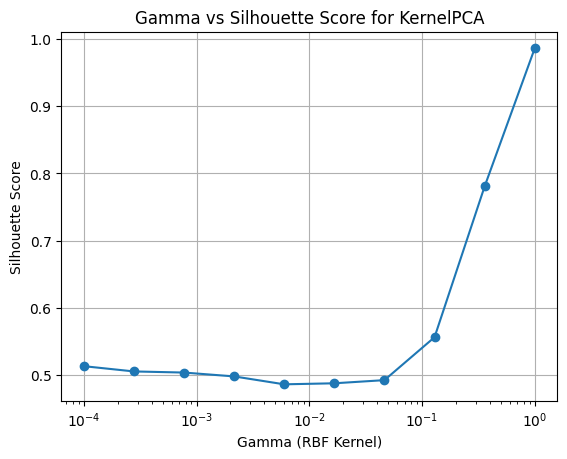

In [42]:
import matplotlib.pyplot as plt

gamma_vals, sil_scores = zip(*scores)

plt.plot(gamma_vals, sil_scores, marker='o')
plt.xscale('log')
plt.xlabel('Gamma (RBF Kernel)')
plt.ylabel('Silhouette Score')
plt.title('Gamma vs Silhouette Score for KernelPCA')
plt.grid(True)
plt.show()

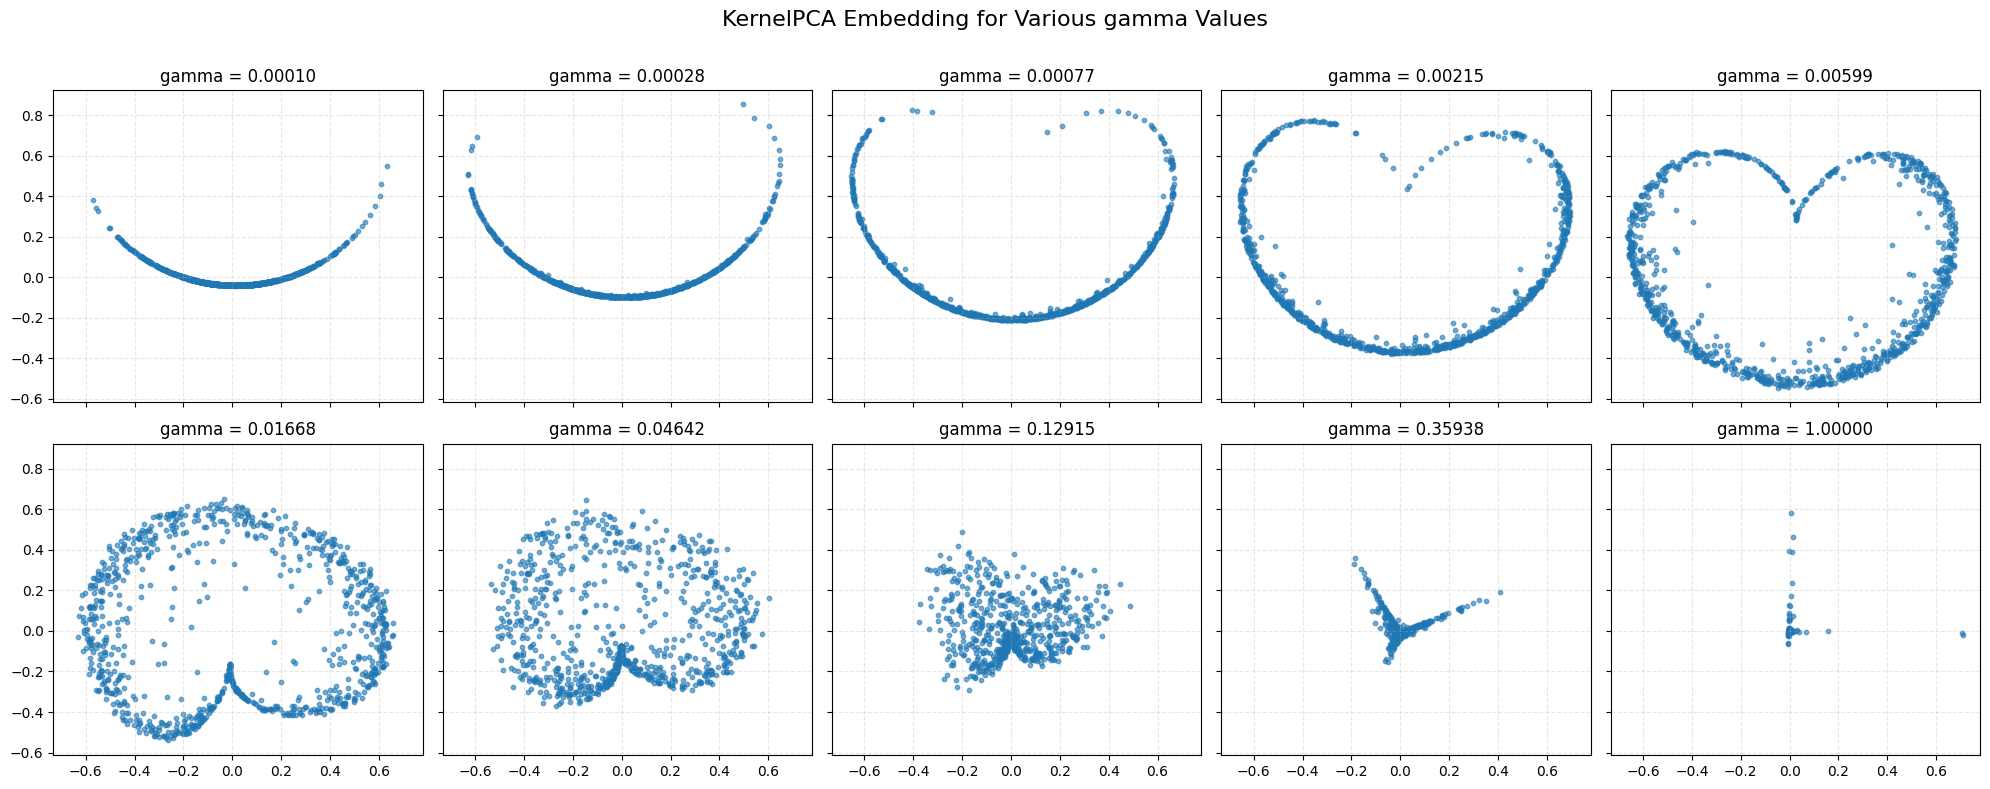

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# MF後の行列
X = mf_matrix.values  # shape: (n_users, n_items)

# 試す gamma 値（Silhouette スコアを参考に）
gammas = [0.0001, 0.00028, 0.00077, 0.00215, 0.00599, 0.01668,
          0.04642, 0.12915, 0.35938, 1.0]

# プロット設定
n_cols = 5
n_rows = int(np.ceil(len(gammas) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8), sharex=True, sharey=True)

# flatten axes in case of 1 row
axes = axes.flatten()

for i, gamma in enumerate(gammas):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, random_state=42)
    X_kpca = kpca.fit_transform(X)

    ax = axes[i]
    ax.scatter(X_kpca[:, 0], X_kpca[:, 1], s=10, alpha=0.6)
    ax.set_title(f"gamma = {gamma:.5f}")
    ax.grid(True, linestyle='--', alpha=0.3)

# 空欄のサブプロット非表示（必要なら）
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle("KernelPCA Embedding for Various gamma Values", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### 🔹 数式（RBFカーネル）:

カーネル関数は以下のように定義されます：

$$
K(x, x') = \exp\left( -\gamma \|x - x'\|^2 \right)
$$

---

### 🔸 gamma の役割：

- データ点間の距離 \( \|x - x'\| \) に対する、カーネルの減衰の鋭さを制御します。
- gamma が **大きい** → 少しの距離でも「異なる」と判断（局所的構造に敏感）
- gamma が **小さい** → 広く「似ている」と判断（大局的構造を保持）


In [ ]:
"""
図の解釈
・目標は甘口・辛口・混合の3つ

①gammaが小さい(U字からハート型)
うまくクラスタリングができていない

②gammaが中程度(お尻型)
シルエットスコアは0.4863で，それ以前のgammaと変化なし
うまくクラスタリングができていない．

③gammaが大きい(三又以降)
データ点が潰れている．
3つのclusterに分離することができない．

"""

# まとめの可視化

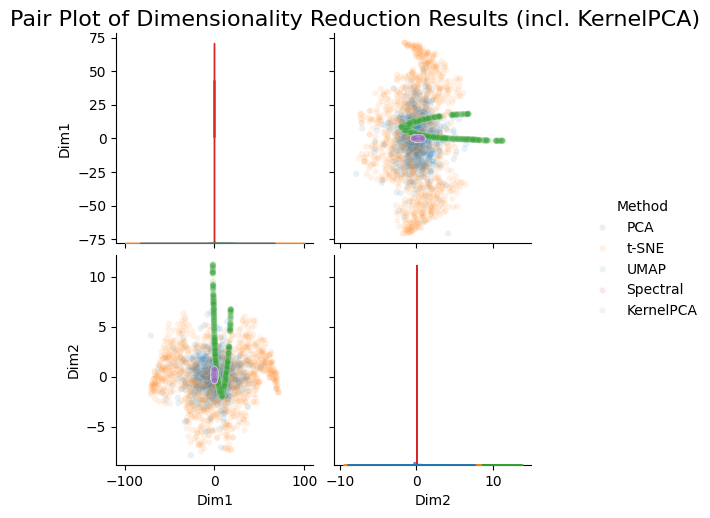

In [50]:
# カーネルPCAも追加して比較する

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# カーネルPCAによる2次元埋め込み（RBFカーネル）
embedding_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00215, random_state=42).fit_transform(X)

# 各手法のDataFrameを整形
df_pca = pd.DataFrame(embedding_pca, columns=['Dim1', 'Dim2'])
df_pca['Method'] = 'PCA'

df_tsne = pd.DataFrame(embedding_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Method'] = 't-SNE'

df_umap = pd.DataFrame(embedding_umap, columns=['Dim1', 'Dim2'])
df_umap['Method'] = 'UMAP'

df_spectral = pd.DataFrame(embedding_spectral, columns=['Dim1', 'Dim2'])
df_spectral['Method'] = 'Spectral'

df_kpca = pd.DataFrame(embedding_kpca, columns=['Dim1', 'Dim2'])
df_kpca['Method'] = 'KernelPCA'

# すべて結合
df_all = pd.concat([df_pca, df_tsne, df_umap, df_spectral, df_kpca], axis=0)

# pairplotで分布比較
sns.pairplot(
    df_all,
    hue='Method',
    diag_kind='kde',
    plot_kws={'alpha': 0.1, 's': 20},
    palette='tab10'
)

plt.suptitle("Pair Plot of Dimensionality Reduction Results (incl. KernelPCA)", fontsize=16, y=1.02)
plt.show()

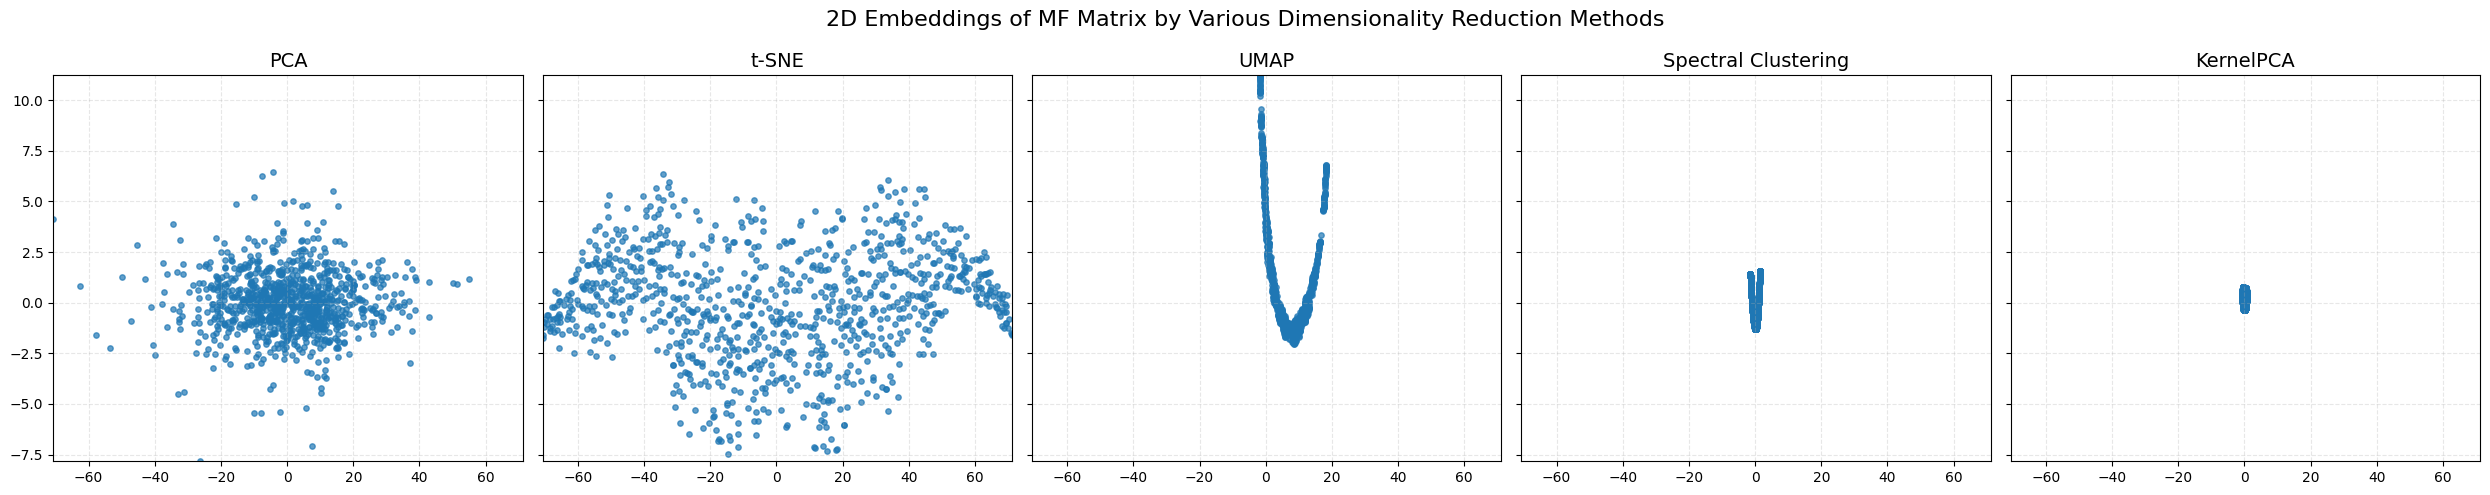

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# もとのMF行列
X = mf_matrix.values

# KernelPCA埋め込み（非線形）
embedding_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00215, random_state=42).fit_transform(X)

# Spectralだけrescale（範囲が極端に小さいため）
embedding_spectral_scaled = StandardScaler().fit_transform(embedding_spectral)

# 5手法の埋め込み結果とタイトルのセット
embeddings = {
    "PCA": embedding_pca,
    "t-SNE": embedding_tsne,
    "UMAP": embedding_umap,
    "Spectral Clustering": embedding_spectral_scaled,
    "KernelPCA": embedding_kpca
}

# 共通スケールの範囲を取得
all_concat = np.vstack(list(embeddings.values()))
x_min, x_max = all_concat[:, 0].min(), all_concat[:, 0].max()
y_min, y_max = all_concat[:, 1].min(), all_concat[:, 1].max()

# プロット
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True, sharey=True)

for ax, (name, data) in zip(axes, embeddings.items()):
    ax.scatter(data[:, 0], data[:, 1], s=15, alpha=0.7)
    ax.set_title(name, fontsize=14)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle="--", alpha=0.3)

fig.suptitle("2D Embeddings of MF Matrix by Various Dimensionality Reduction Methods", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # タイトルが重ならないように調整
plt.show()

# 5種の次元削減によるクラスタリングの可視化

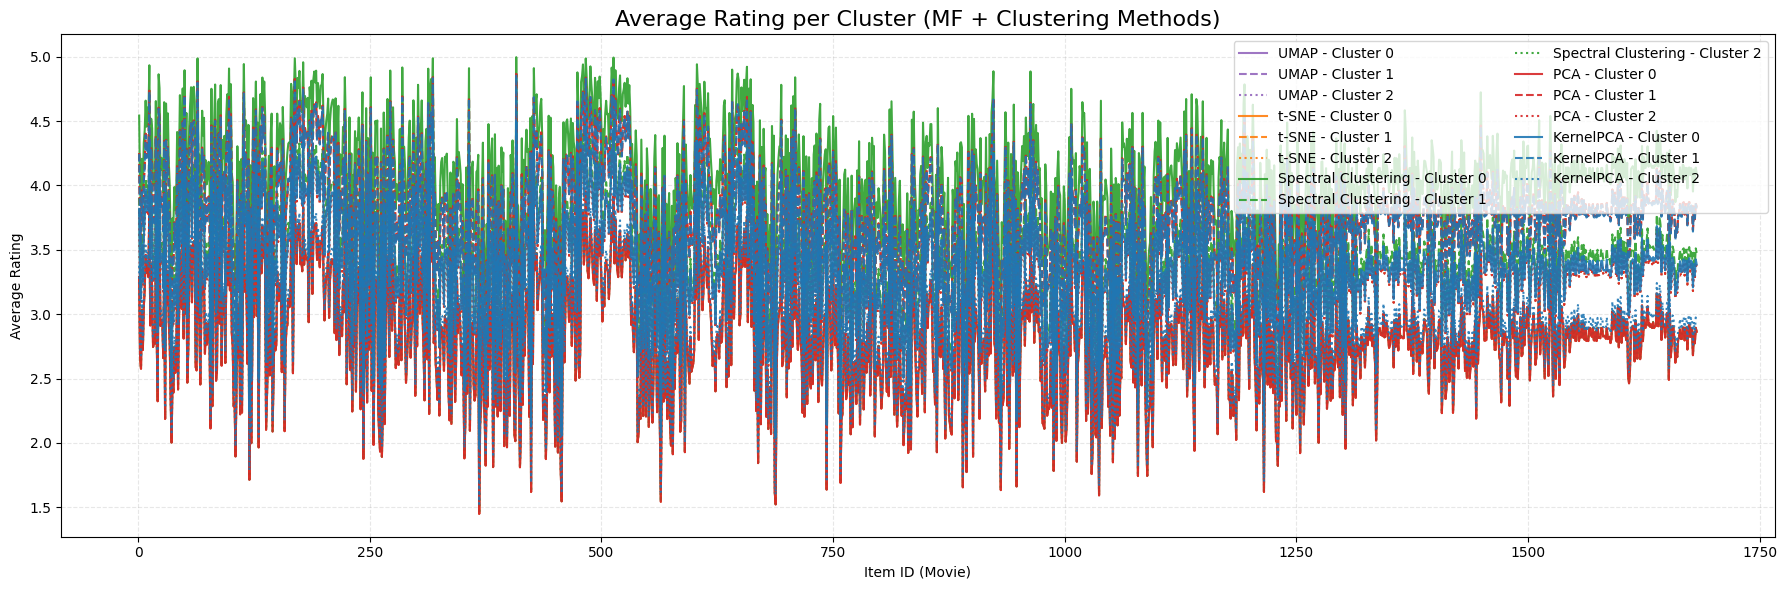

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import pandas as pd

# -------- KernelPCA処理（gamma=0.00215） --------
X = mf_matrix.values
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00215, random_state=42)
kpca_embedding = kpca.fit_transform(X)

kpca_labels = KMeans(n_clusters=3, random_state=42).fit_predict(kpca_embedding)

# DataFrameに追加してクラスタ平均を取る
mf_matrix_kpca = mf_matrix.copy()
mf_matrix_kpca['cluster_kpca'] = kpca_labels
cluster_profile_kpca = mf_matrix_kpca.groupby('cluster_kpca').mean()

# 列順を他と揃える
common_columns = cluster_profile_pca.columns
cluster_profile_kpca = cluster_profile_kpca[common_columns]

# -------- プロット --------
plt.figure(figsize=(18, 6))

# 手法ごとの色（KernelPCA追加）
method_colors = {
    "UMAP":     "tab:purple",
    "t-SNE":    "tab:orange",
    "Spectral Clustering": "tab:green",
    "PCA":      "tab:red",
    "KernelPCA": "tab:blue"
}

# クラスタごとの線種
cluster_linestyles = {
    0: "-",
    1: "--",
    2: ":"
}

# 手法一覧に KernelPCA 追加
methods = [
    ("UMAP",      cluster_profile_umap),
    ("t-SNE",     cluster_profile_tsne),
    ("Spectral Clustering",  cluster_profile_spec),
    ("PCA",       cluster_profile_pca),
    ("KernelPCA", cluster_profile_kpca)
]

# 描画
for method_name, profile_df in methods:
    for cluster_id in profile_df.index:
        plt.plot(
            profile_df.columns,
            profile_df.loc[cluster_id],
            label=f"{method_name} - Cluster {cluster_id}",
            color=method_colors[method_name],
            linestyle=cluster_linestyles[cluster_id],
            linewidth=1.5,
            alpha=0.9
        )

plt.title("Average Rating per Cluster (MF + Clustering Methods)", fontsize=16)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# PCAとt-SNE, UMAPが同じ

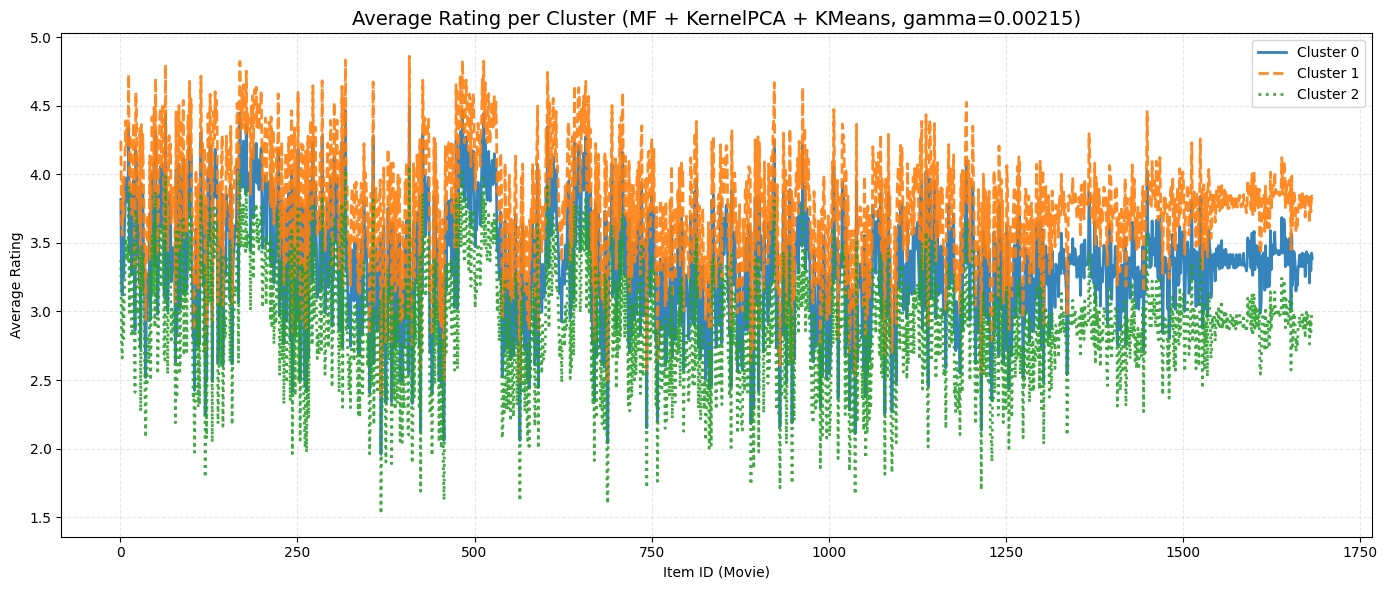

In [57]:
# gamma = 0.00215の時

import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import pandas as pd

# -------- KernelPCA + KMeans --------
X = mf_matrix.values
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00215, random_state=42)
kpca_embedding = kpca.fit_transform(X)

# クラスタリング（3クラスタ）
kpca_labels = KMeans(n_clusters=3, random_state=42).fit_predict(kpca_embedding)

# クラスタラベルをDataFrameに追加
mf_matrix_kpca = mf_matrix.copy()
mf_matrix_kpca['cluster_kpca'] = kpca_labels

# クラスタごとの平均評価を計算
cluster_profile_kpca = mf_matrix_kpca.groupby('cluster_kpca').mean()

# -------- 可視化 --------
plt.figure(figsize=(14, 6))

# クラスタごとの線種
cluster_linestyles = {
    0: "-",
    1: "--",
    2: ":"
}

# 描画ループ
for cluster_id in cluster_profile_kpca.index:
    plt.plot(
        cluster_profile_kpca.columns,
        cluster_profile_kpca.loc[cluster_id],
        label=f"Cluster {cluster_id}",
        linestyle=cluster_linestyles[cluster_id],
        linewidth=2,
        alpha=0.9
    )

# グラフ設定
plt.title("Average Rating per Cluster (MF + KernelPCA + KMeans, gamma=0.00215)", fontsize=14)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


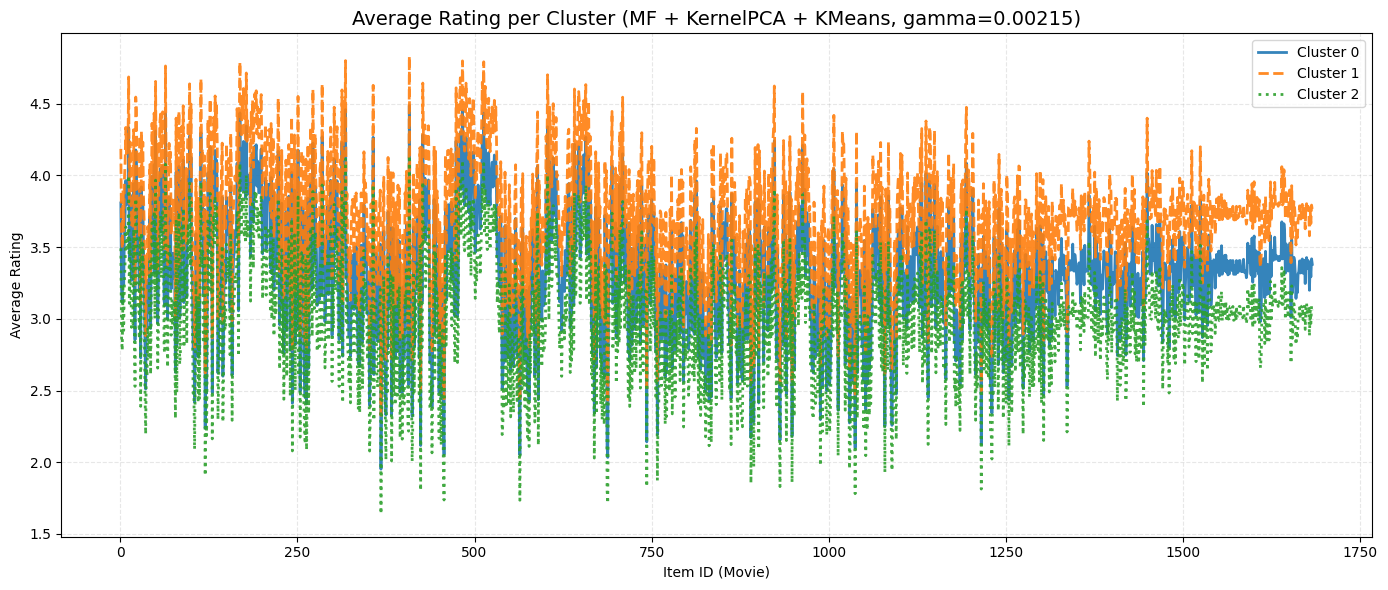

In [67]:
# gamma = 0.00599の時

import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import pandas as pd

# -------- KernelPCA + KMeans --------
X = mf_matrix.values
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00599, random_state=42)
kpca_embedding = kpca.fit_transform(X)

# クラスタリング（3クラスタ）
kpca_labels = KMeans(n_clusters=3, random_state=42).fit_predict(kpca_embedding)

# クラスタラベルをDataFrameに追加
mf_matrix_kpca = mf_matrix.copy()
mf_matrix_kpca['cluster_kpca'] = kpca_labels

# クラスタごとの平均評価を計算
cluster_profile_kpca = mf_matrix_kpca.groupby('cluster_kpca').mean()

# -------- 可視化 --------
plt.figure(figsize=(14, 6))

# クラスタごとの線種
cluster_linestyles = {
    0: "-",
    1: "--",
    2: ":"
}

# 描画ループ
for cluster_id in cluster_profile_kpca.index:
    plt.plot(
        cluster_profile_kpca.columns,
        cluster_profile_kpca.loc[cluster_id],
        label=f"Cluster {cluster_id}",
        linestyle=cluster_linestyles[cluster_id],
        linewidth=2,
        alpha=0.9
    )

# グラフ設定
plt.title("Average Rating per Cluster (MF + KernelPCA + KMeans, gamma=0.00215)", fontsize=14)
plt.xlabel("Item ID (Movie)")
plt.ylabel("Average Rating")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
"""
①クラスタ間の乖離具合
②クラスタ内の一貫性
から，
KernelPCA > PCA = UMAP = t-SNE > Spectral Clustering
の順番にクラスタリングが良好であると言える．
"""

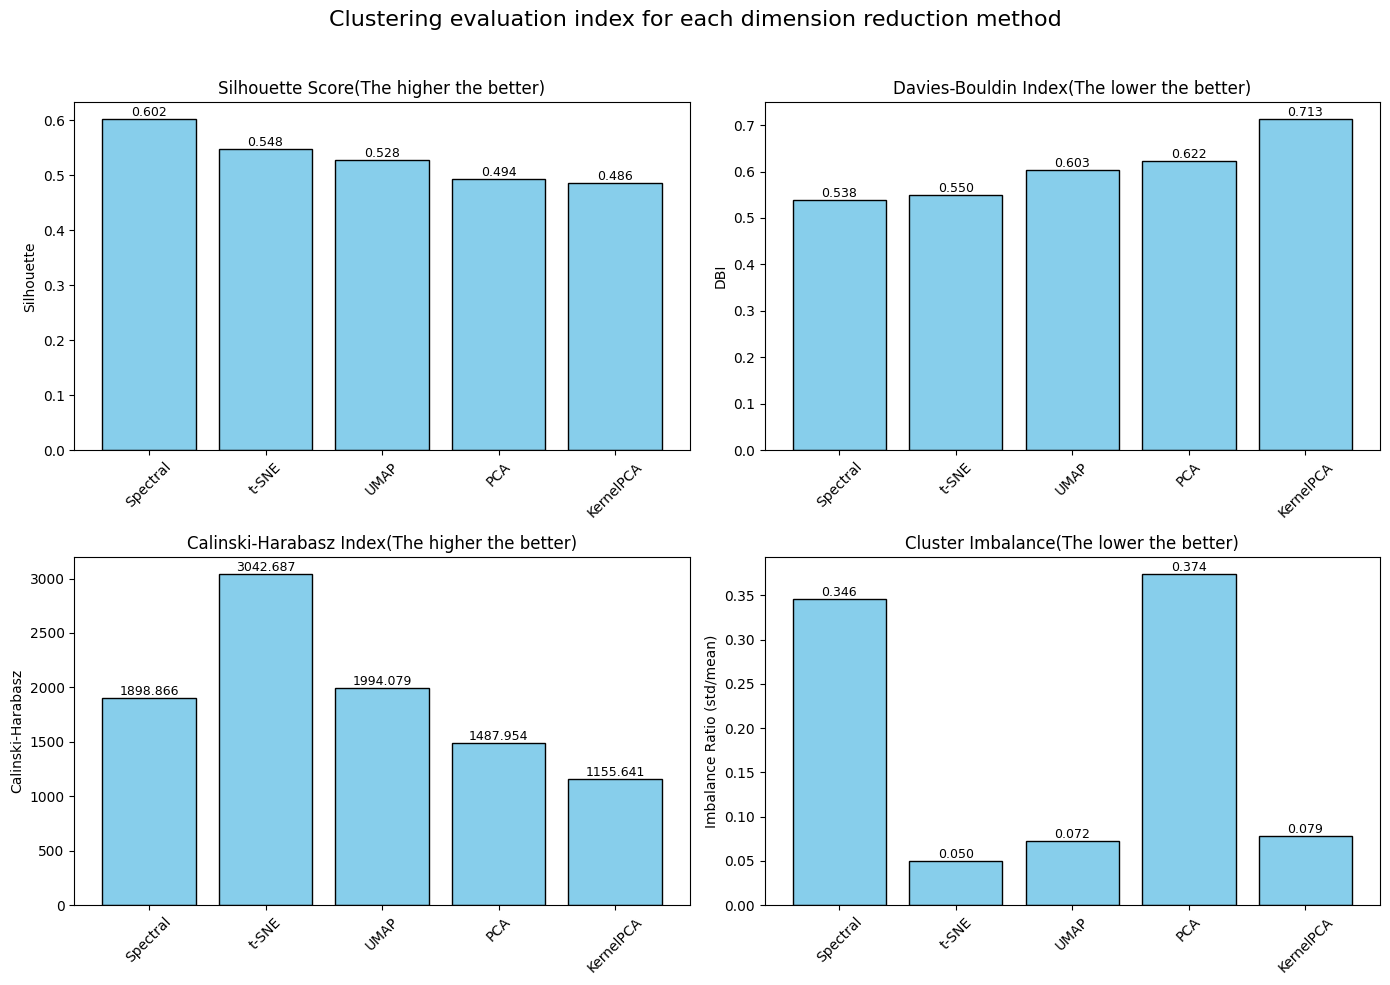

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

# ===== 次元削減結果（各手法の2次元埋め込み行列）を用意 =====
# 各埋め込みは shape=(n_samples, 2)
# 例：embedding_pca = PCA(...).fit_transform(X)

embedding_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00599, random_state=42).fit_transform(X)

methods = {
    "PCA": embedding_pca,
    "t-SNE": embedding_tsne,
    "UMAP": embedding_umap,
    "Spectral": embedding_spectral,
    "KernelPCA": embedding_kpca  # gamma=0.00215 の結果
}

# ===== 評価結果を記録 =====
results = []

for name, X_emb in methods.items():
    labels = KMeans(n_clusters=3, random_state=42).fit_predict(X_emb)
    
    sil_score = silhouette_score(X_emb, labels)
    dbi = davies_bouldin_score(X_emb, labels)
    chi = calinski_harabasz_score(X_emb, labels)
    
    counts = pd.Series(labels).value_counts().values
    imbalance = counts.std() / counts.mean()
    
    results.append({
        "Method": name,
        "Silhouette": sil_score,
        "DBI": dbi,
        "Calinski-Harabasz": chi,
        "Imbalance Ratio (std/mean)": imbalance
    })

df_results = pd.DataFrame(results).sort_values("Silhouette", ascending=False)

# ===== 可視化（4つの棒グラフ） =====
metrics = ["Silhouette", "DBI", "Calinski-Harabasz", "Imbalance Ratio (std/mean)"]
titles = {
    "Silhouette": "Silhouette Score(The higher the better)",
    "DBI": "Davies-Bouldin Index(The lower the better)",
    "Calinski-Harabasz": "Calinski-Harabasz Index(The higher the better)",
    "Imbalance Ratio (std/mean)": "Cluster Imbalance(The lower the better)"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.bar(df_results["Method"], df_results[metric], color="skyblue", edgecolor="black")
    ax.set_title(titles[metric], fontsize=12)
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(df_results["Method"])))
    ax.set_xticklabels(df_results["Method"], rotation=45)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:.3f}", ha="center", va="bottom", fontsize=9)

plt.suptitle("Clustering evaluation index for each dimension reduction method", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


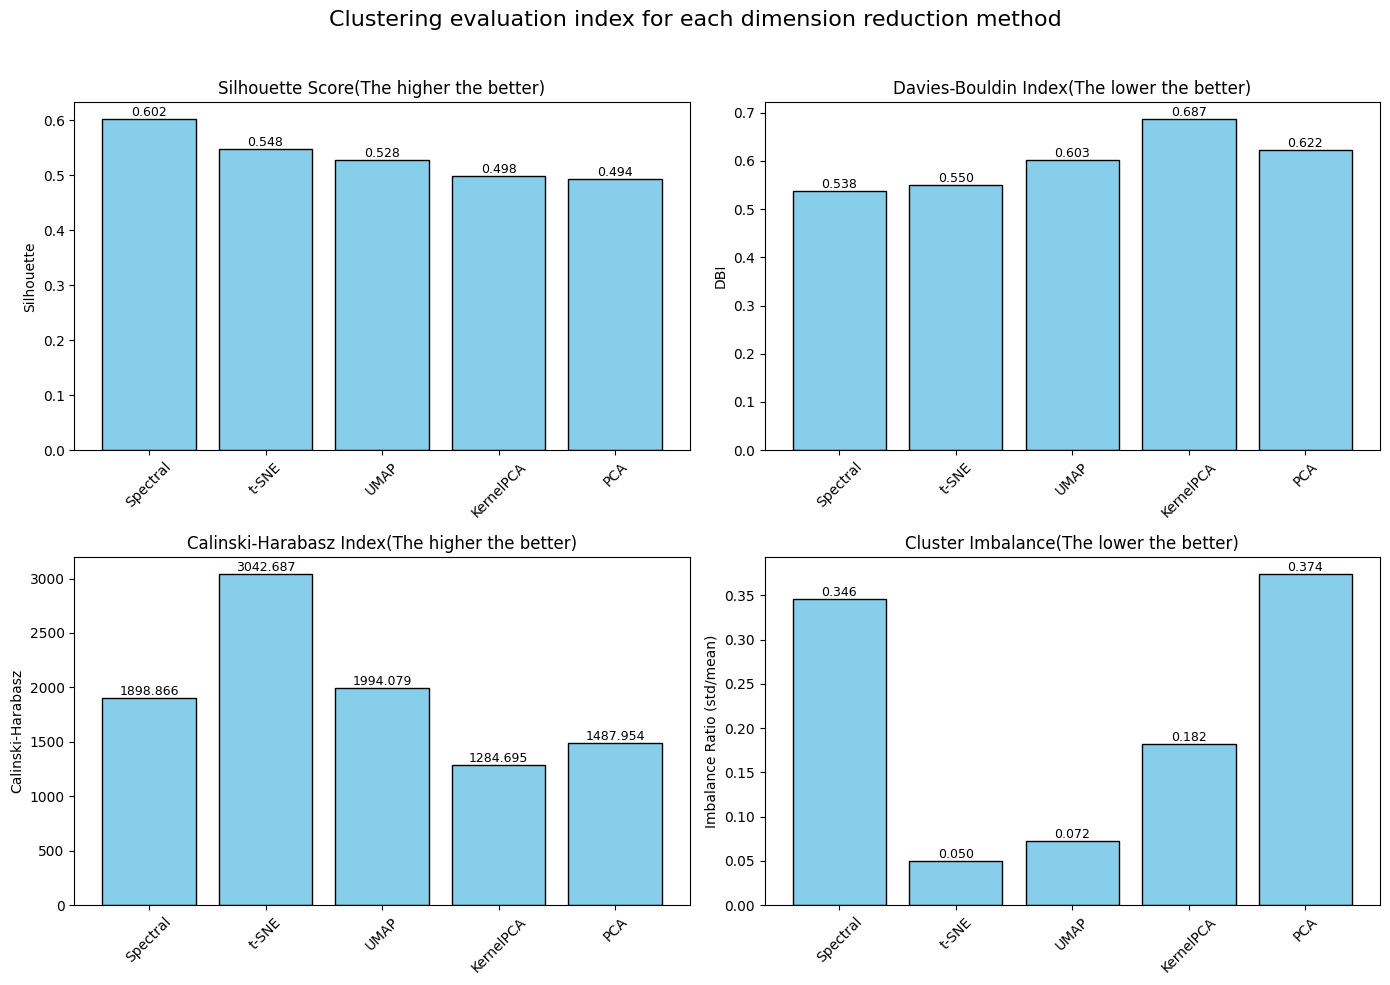

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

# ===== 次元削減結果（各手法の2次元埋め込み行列）を用意 =====
# 各埋め込みは shape=(n_samples, 2)
# 例：embedding_pca = PCA(...).fit_transform(X)

embedding_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00215, random_state=42).fit_transform(X)

methods = {
    "PCA": embedding_pca,
    "t-SNE": embedding_tsne,
    "UMAP": embedding_umap,
    "Spectral": embedding_spectral,
    "KernelPCA": embedding_kpca  # gamma=0.00215 の結果
}

# ===== 評価結果を記録 =====
results = []

for name, X_emb in methods.items():
    labels = KMeans(n_clusters=3, random_state=42).fit_predict(X_emb)
    
    sil_score = silhouette_score(X_emb, labels)
    dbi = davies_bouldin_score(X_emb, labels)
    chi = calinski_harabasz_score(X_emb, labels)
    
    counts = pd.Series(labels).value_counts().values
    imbalance = counts.std() / counts.mean()
    
    results.append({
        "Method": name,
        "Silhouette": sil_score,
        "DBI": dbi,
        "Calinski-Harabasz": chi,
        "Imbalance Ratio (std/mean)": imbalance
    })

df_results = pd.DataFrame(results).sort_values("Silhouette", ascending=False)

# ===== 可視化（4つの棒グラフ） =====
metrics = ["Silhouette", "DBI", "Calinski-Harabasz", "Imbalance Ratio (std/mean)"]
titles = {
    "Silhouette": "Silhouette Score(The higher the better)",
    "DBI": "Davies-Bouldin Index(The lower the better)",
    "Calinski-Harabasz": "Calinski-Harabasz Index(The higher the better)",
    "Imbalance Ratio (std/mean)": "Cluster Imbalance(The lower the better)"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.bar(df_results["Method"], df_results[metric], color="skyblue", edgecolor="black")
    ax.set_title(titles[metric], fontsize=12)
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(df_results["Method"])))
    ax.set_xticklabels(df_results["Method"], rotation=45)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:.3f}", ha="center", va="bottom", fontsize=9)

plt.suptitle("Clustering evaluation index for each dimension reduction method", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

| 指標名                   | 数式での定義         | 評価基準          | 説明                 |
| --------------------- | -------------- | ------------- | ------------------ |
| **Davies-Bouldin**    | 平均「ばらつき / 距離」  | **小さいほど良い**  | 似たクラスタが多いとスコア悪化    |
| **Calinski-Harabasz** | 分離度 / 密集度 ×調整項 | **大きいほど良い**  | よく分かれていればスコアが大きくなる |
| **Imbalance Ratio**   | 標準偏差 / 平均      | **小さいほど良い**  | 偏りのあるクラスタ構成だと大きくなる |


## 🔹 1. Davies-Bouldin Index（DBI）

### ● 意味  
クラスタ内の「ばらつき」と、クラスタ間の「距離」の比を取った指標。  
**小さいほど良い**（＝クラスタが分離されていて、内部は密）

### ● 数式  

$$
\mathrm{DBI} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{S_i + S_j}{M_{ij}} \right)
$$

- $k$：クラスタ数  
- $S_i$：クラスタ $i$ の内部のばらつき（以下で定義）

$$
S_i = \frac{1}{|C_i|} \sum_{x \in C_i} \| x - \mu_i \|
$$

- $M_{ij}$：クラスタ $i$ と $j$ の重心間距離

$$
M_{ij} = \| \mu_i - \mu_j \|
$$

### ● 解釈  
- 各クラスタに対して「最も重なりやすい他クラスタとのスコア」を計算  
- 値が **小さいほど**、クラスタ同士が **よく分離されていて内部が密**

---

## 🔹 2. Calinski-Harabasz Index（CHI）

### ● 意味  
クラスタ間の「距離」が大きく、クラスタ内の「ばらつき」が小さいと高評価。  
**大きいほど良い**

### ● 数式  

$$
\mathrm{CHI} = \frac{\mathrm{Tr}(B_k)}{\mathrm{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

- $n$：サンプル数  
- $k$：クラスタ数  
- $\mathrm{Tr}(B_k)$：クラスタ重心と全体重心の分散（クラスタ間の分離度）  
- $\mathrm{Tr}(W_k)$：クラスタ内の分散（ばらつき）

### ● 解釈  
- 値が **大きいほど**、クラスタが**よく分かれていて内部がまとまっている**
---

## 🔹 3. クラスタ不均衡度（Imbalance Ratio）

### ● 意味  
各クラスタのサンプル数の「偏り（ばらつき）」を測る指標。  
**小さいほど良い**（＝クラスタサイズが均等）

### ● 数式  

$$
\mathrm{Imbalance~Ratio} = \frac{\mathrm{std}(\{n_1, n_2, ..., n_k\})}{\mathrm{mean}(\{n_1, n_2, ..., n_k\})}
$$

- $n_i$：クラスタ $i$ に属するサンプル数

### ● 解釈  
- 完全に均等なクラスタ分布：$\text{Imbalance Ratio} = 0$  
- 偏りがあると **0.5〜1.0** 以上にもなり得る  
- 実務上は **0.3以下が望ましい**
---

# 次元削減まとめ

In [ ]:
"""
4つの評価指標から，最も次元削減手法として適している手法は，
t-SNE > Spectral Clustering > UMAP > KernelPCA > PCA
"""